## Final Project Submission

Please fill out:
* Student name: Liza Kaley
* Student pace: self paced
* Scheduled project review date/time: 6/26/2019, 4pm MST
* Instructor name: Eli Thomas
* Blog post URL: https://lizakaley08.github.io/multicollinearity_when_working_with_multiple_regression


# KING COUNTY HOUSE PRICES - What market and home feature influence the home price?

# OSEMN Data Science Workflow Process

The worflow process used for this project will be the OSEMN data science process.  There are several different data science processes that are used by data scientists; however, the OSEMN process is one of the most straightforward and logical processes to follow and understand.  Following are the five steps of this process and how they are applied in this project:

## Step 1: Obtain the Data
  * Understand what the stakeholder requires from this project
  * Find out what information/data is needed to meet stakeholder requirements
  * Gather the information/data needed

## Step 2: Scrub the Data
  * Look at the data
  * Address observations and next steps
      * Deal with null values
      * Identify and decide what to do with outliers
      
## Step 3: Explore/Evaluate the Data
  * Check for correlation and multicollinearity
  * Continue to examine data for potential outliers
  * Visualize the data
  * Define and deal with categorical data (one-hot code)
  * Normalize & scale data (this is typically done in the scrub process, however placed here once fully comfortable with data and definition of categorical data was complete.

## Step 4: Model the Data
  * Define threshold for successful model
  * Build and run the model
  * Fine tune and make adjustments to model based on results
  
## Step 5: iNterpret the Data
  * Interpret and communicate findings/results
  * Go back and make adjustments to model based on results

## Goal - Determine what market and home features are good predictors of home sale prices in King County.

# Obtain the Data

## 1.1 Stakeholder Requirement

### Predict housing prices in King County based on market and home features.

#### The King County House Sales dataset includes the following Features
1. id - a unique code to identify an individual house
2. date - date the house was sold
3. price - sale price and target/prediction variable
4. bedrooms - number of bedrooms of home
5. bathrooms - number of bathrooms/bedrooms of home
6. sqft_living - square foot interior living space of home
7. sqft_lot - square footage of land lot size for home
8. floors - floors/levels in home
9. waterfront - home with or without view to a waterfront
10. view - has the home been viewed
11. condition - how is the overall condition of the home
12. grade - overall grade given to the home, based on the King County grading system
13. sqft_above - square foot living space of the home, excluding basement square footage
14. sqft_basement - square footage of the basement
15. yr_built - year home was built
16. yr_renovated - year the home was renovated
17. zipcode - home's zipcode
18. lat - latitude coordinate of the home
19. long - longitude coordinate of the home
20. sqft_living15 - square foot interior living space for the nearest 15 neighbors
21. sqft_lot15 - square footage of land lot size for the nearest 15 neighbors


## 1.2 Import libraries and King County House Sales dataset, "kc_house_data.csv".

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics



plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Import/read King County House Sales dataset, "kc_house_data.csv"
kc_df = pd.read_csv('kc_house_data.csv')

### Questions to think about while going thru the next two process steps, Scrub the Data and Explore/Evaluate the Data:

1.)  What home features influence Price (e.g., Number of Bedrooms, Condition, Grade, Year Built)?

2.)  Does location influence Price?

3.)  Did renovations increase square footage of living space?  Did this impact Price?

4.)  Does the time of year influence the Price?

# Scrub the Data


## 2.1 Look at the Data

In [3]:
# Look at the dataframe
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Initial Observations:

1. Sqft_living, sqft_lot and sqft_above look to be the correct dtypes.

2. Date and sqft_basement are not the correct types.

3. View is not the correct type.

4. Waterfront is a continuous variable, should this be categorical?  Missing values.

5. Should condition be continuous?

6. Should grade be continuous?

7. Yr_renovated has missing values.  Why would this be a set at a float datatype?

8. There is a house with 33 bedrooms.

9. What to do with zipcode, lat and long?

#### Comments on Initial Observations and Next Steps:

1. Look into Sqft_living, sqft_lot and sqft_above.
2. It is assumed that the date could very easily have an effect on the sale price and will require further analysis.
3. Sqft_basement is not missing any values and should not be an object dtype.  After more analysis, it is likely that this will be changed to an int64.  Investigate if sqft_basement is included in sqft_living and/or if a house has been renovated is it possible that this variable is included in renovated sqft_living.
4. Initial thought is that View should not be a continuous variable.  Analyze whether or not it should be converted to a different data type.  The description of view is "has been viewed".  Decide if this should be a 0 for no and 1 for yes or is the description off (e.g., rather than yes or no, how many times it has been viewed).
5. Look into missing waterfront values.  Determine if waterfront should be coverted to categorical?
6. Determine if condition and grade should be continuous or converted in categorical.
7. Look into yr_renovated missing values.  What datatype should it be?  What are the unique values?  The min and max are 0 and 2015.  What's in between?  Should this be categorical?
8. Look into the house with 33 bedroom.  Does this seem right or maybe an error in the data?  What's the sqft_footage of this home?  How many bedrooms & bathrooms?  Decide if it should be dropped from the data.
9. Evaluate zipcode, lat and long.

## 2.2 Address Observations and Next Steps

### Skip the first step for looking into sqft_living, sqft_lot and sqft_above until after addressing sqft_basement.

### Change date datatype from object to datetime

In [6]:
kc_df.date = pd.to_datetime(kc_df.date)

### Research sqft_basement to assess if data makes sense and potentially correct type

In [7]:
# Check unique values counts
kc_df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [8]:
# Calculate the % of homes with no basement
sum(kc_df.sqft_basement == "0.0")/len(kc_df)

0.5938787794601103

In [9]:
# Calculate the % of homes with '?' basement square footage
sum(kc_df.sqft_basement == "?")/len(kc_df)

0.021021438162707785

A small percent, approximately 2%, of basement squarefoot values are '?' which is less than an assumed level of significance of 5%.  Almost 60% of the homes in the dataset have no basement.  Given the very low percent of questionable homes with unknown basement square footage and the high percent of homes with no basement, the '?' value for basement square footage will be changed to 0.  Then change 'sqft_basement' to numeric.

In [10]:
kc_df.sqft_basement.replace(to_replace = '?', value = "0", inplace = True) 
kc_df.sqft_basement = kc_df.sqft_basement.apply(pd.to_numeric)

### Look into sqft_living, sqft_above and sqft_basement

Now that sqft_basement is numeric, look to see how many houses sqft_living equals combined the sqft_above and sqft_basement.

In [11]:
((kc_df.sqft_above + kc_df.sqft_basement) == kc_df.sqft_living).sum()/len(kc_df)

0.9921285363707922

This says that 99% of the homes sqft_living is equal to the sqft_above and sqft_basement; therefore, it may make sense to eliminate one of these features.  Revisit at time of Heat Map and Multicollinearity test.

What does the distribution look like for these three features?

In [12]:
sqft_house = kc_df[['sqft_living', 'sqft_above', 'sqft_basement']]

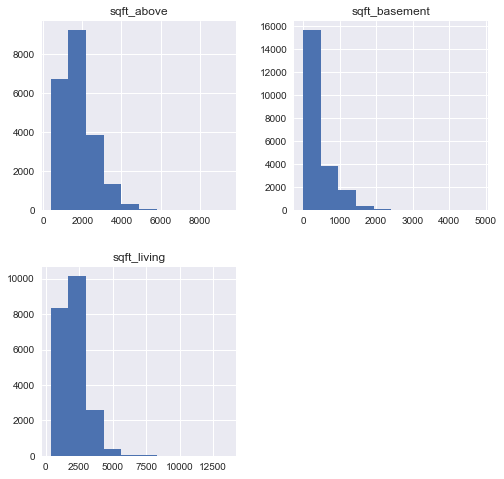

In [13]:
sqft_house.hist(figsize = (8,8));

The sqft_above, sqft_basement and sqft_living all appear to be positively skewed based on the above histograms.

How does the sqft_living compare to sqft_living15 (e.g., interior living space for the nearest 15 neighbors)?

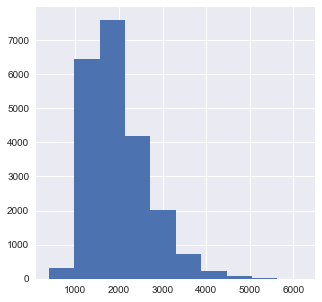

In [14]:
kc_df.sqft_living15.hist(figsize = (5,5));

Sqft_living15 along with the other sqft living features appears to be positively skewed.

In [15]:
kc_df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [16]:
kc_df.sqft_living15.describe()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

Both are similarly distributed and skewed. Revisit during multicollinearity analysis.  Also, given the skewedness to each of these variables, it is likely that they should be transformed. It also looks like there may be possible sqft_living outliers since the max value is more than twice the amount of max value of sqft_living15.

### Deal with View

What is the percent of null values in the view feature?

In [17]:
# Percent of null values in view feature
sum(kc_df.view.isna())/len(kc_df)

0.0029170718155299346

What are the values and respective counts?

In [18]:
# how many unique values in view feature
kc_df.view.nunique()

5

In [19]:
# what is the value count for unique values
kc_df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

What is the percentage associated with each unique value?

In [20]:
# what is the % of value count for the unique values
kc_df.view.value_counts()/len(kc_df)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

The number of missing values in the view feature is far less than 1%.  Assuming a level of significance is 5%, it is safe to assume that the homes with these missing values can be changed to the most common value (e.g., 0) from the dataset without a material impact to how this feature is skewed.

In [21]:
# Change null values to 0
kc_df.view.replace(np.NaN, 0.0, inplace=True)

The description of view is has been viewed which would most commonly be thought of as yes or no versus a number/option of 0-4.  Assume 0 means the house has not been viewed and anything greater than 0 has been viewed and change to 0 or 1.

In [22]:
kc_df.view.unique()

array([0., 3., 4., 2., 1.])

In [23]:
kc_df['viewed'] = kc_df.view
i = 4
while i > 0:
    kc_df.viewed = kc_df.viewed.replace(i,1)
    i -= 1

In [24]:
kc_df.viewed.unique()

array([0., 1.])

In [25]:
kc_df.drop('view', axis=1, inplace=True)

### Deal with missing waterfront values & determine if it should it be categorical

#### What is the percent of missing waterfront values?

In [26]:
sum(kc_df.waterfront.isna())/len(kc_df)

0.11001527989998611

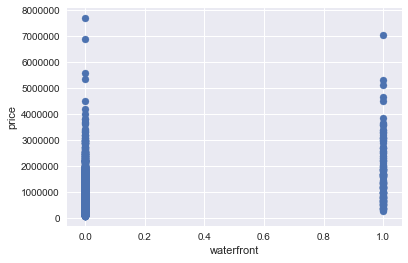

In [27]:
plt.scatter(kc_df.waterfront, kc_df.price)
plt.xlabel('waterfront')
plt.ylabel('price')
plt.show()

It does not appear that the price and whether or not the home is waterfront are directly related (e.g., there appear to be many homes with a price range from 0 to 4,000,000 with and without a waterfront view).

#### What are the unique waterfront values and the respective value counts?

In [28]:
# Look at unique values for waterfront
print(kc_df.waterfront.unique())

[nan  0.  1.]


In [29]:
# what is the % of value count for the unique values
kc_df.waterfront.value_counts()/len(kc_df)

0.0    0.883225
1.0    0.006760
Name: waterfront, dtype: float64

#### Take another look at waterfront 5 point statistics

In [30]:
# waterfront 5 point statistics
kc_df.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [31]:
kc_df.waterfront.mean() + kc_df.waterfront.std()*3

0.2680703957978928

The percent of homes that are not waterfront is almost 90%.  The mean plus 3 standard deviations is well below the maximum value of 1.  Therefore there is sufficient statistics to support replacing the missing values with the mode (e.g., 0). 

#### Replace the waterfront missing values with the mode

In [32]:
# Replace missing waterfront values with 0

kc_df.waterfront.fillna(kc_df.waterfront.mode()[0], inplace = True)

In [33]:
# Percent distribution of homes with and without waterfront views, 1 and 0, respectively.

kc_df.waterfront.value_counts()/len(kc_df)

0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64

### Determine appropriate datatype for condition

In [34]:
# How many unique condition values

kc_df.condition.nunique()

5

In [35]:
# What are the value counts for each unique condition value

kc_df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

Using a histogram, take a look to see what the distribution looks like for the condition values. 

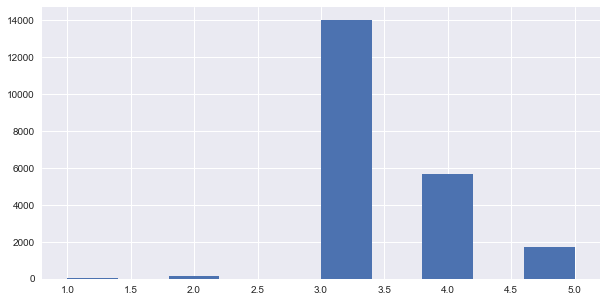

In [36]:
kc_df.condition.hist(figsize = (10,5))

It is quite clear through visualization that most of the homes have a "3" value (e.g., average) while not many are below average with a 1 to 2 value but more have received a greater than average condition value.  This also indicates that there are quite possibly outliers to this feature.

Take a closer look at a jointplot to further investigate and become more familiar with the data within the condition feature.  Since the target variable is known to be price, this will be the y axis and condition will be the x axis.

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


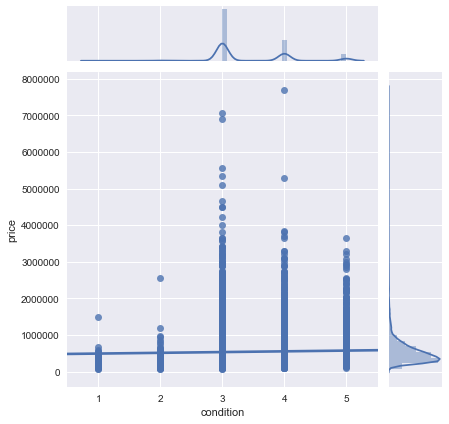

In [37]:
sns.jointplot(x='condition', y='price', label='Condition', data=kc_df, kind = 'reg')

There appear to be outliers when looking at condition with price.  Based on the slope (e.g., it is pretty flat) it doesn't look like there is much of a positive correlation between condition and price.  Groupby condition and look at some of the 5 point test statistics.

In [38]:
kc_df.groupby('condition').price.agg(['count', 'mean', 'min', 'median', 'max'])

,count,mean,min,median,max
condition,,,,,
1,29,341067.241379,78000.0,270000.0,1500000.0
2,170,328178.758824,80000.0,279000.0,2560000.0
3,14020,542173.057347,82000.0,450250.0,7060000.0
4,5677,521374.450414,89000.0,440000.0,7700000.0
5,1701,612577.742504,110000.0,526000.0,3650000.0


It is interesting that the mean price goes up and down in relation to the condition.  Additionally, the max price of the highest condition, 5, is less than the max price for both condition 3 and 4.

Leave as is for now.

### Look into grade

In [39]:
# How many unique condition values

kc_df.grade.nunique()

11

In [40]:
# What are the value counts for each unique condition value

kc_df.grade.value_counts().sort_index()

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

Using a histogram, take a look to see what the distribution looks like for grade values. 

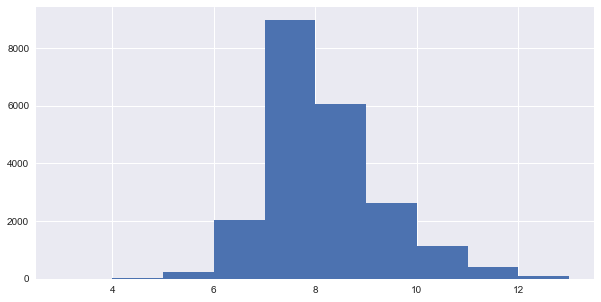

In [41]:
kc_df.grade.hist(figsize = (10,5))

The distribution of grade looks to be fairly normal when looking at the histogram.

Take a closer look at a jointplot to further investigate and become more familiar with the data within the grade feature.  Again, since the target variable is known to be price, this will be the y axis and grade will be the x axis.

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


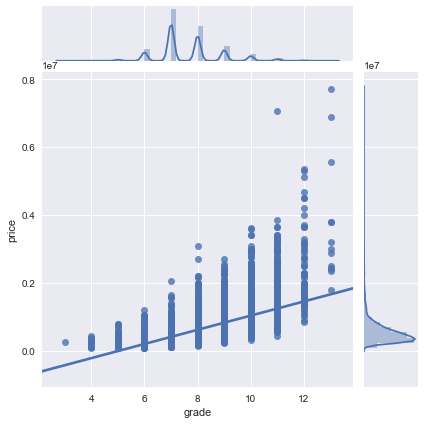

In [42]:
sns.jointplot(x='grade', y='price', label='grade', data=kc_df, kind = 'reg')

The jointplot slope shows that there is a positive correlation, as the grade increases the price appears to increase too.

In [43]:
kc_df.groupby('grade').price.agg(['count', 'mean', 'min', 'median', 'max'])

,count,mean,min,median,max
grade,,,,,
3,1,2.620000e+05,262000.0,262000.0,262000.0
4,27,2.120019e+05,80000.0,200000.0,435000.0
5,242,2.485240e+05,78000.0,228700.0,795000.0
6,2038,3.019166e+05,82000.0,275276.5,1200000.0
7,8974,4.025946e+05,90000.0,375000.0,2050000.0
8,6065,5.429868e+05,140000.0,510000.0,3070000.0
9,2615,7.737382e+05,230000.0,720000.0,2700000.0
10,1134,1.072347e+06,316000.0,914327.0,3600000.0
11,399,1.497792e+06,420000.0,1280000.0,7060000.0


Revisit if grade should be changed to categorical.

When grouping by grade with price the data tends to relate to what is visualized in the above jointplot; however, at least one outlier becomes quite obvious (e.g., there is only one home with a grade of 3 and it's price is higher than the average of the next two levels.   

### Look into and determine what to do with yr_renovated missing values

In [44]:
# How many unique condition values

kc_df.yr_renovated.nunique()

70

In [45]:
# What are the unique values for yr_renovated sorted by count

kc_df.yr_renovated.value_counts().sort_values(ascending=False).head(10)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64

In [46]:
# Percent distribution of renovated homes by renovation year

(kc_df.yr_renovated.value_counts()/len(kc_df)).head(10)

0.0       0.787656
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
2007.0    0.001389
2000.0    0.001343
2005.0    0.001343
1990.0    0.001019
2004.0    0.001019
2009.0    0.000972
Name: yr_renovated, dtype: float64

In [47]:
(kc_df.yr_renovated.value_counts()/len(kc_df)).tail(10)

1950.0    0.000046
1934.0    0.000046
1944.0    0.000046
1976.0    0.000046
1948.0    0.000046
1946.0    0.000046
1959.0    0.000046
1971.0    0.000046
1951.0    0.000046
1954.0    0.000046
Name: yr_renovated, dtype: float64

In [48]:
# How many yr_renovated values are null values

sum(kc_df.yr_renovated.isna())

3842

Using a histogram, take a look to see what the distribution looks like for yr_renovated values. 

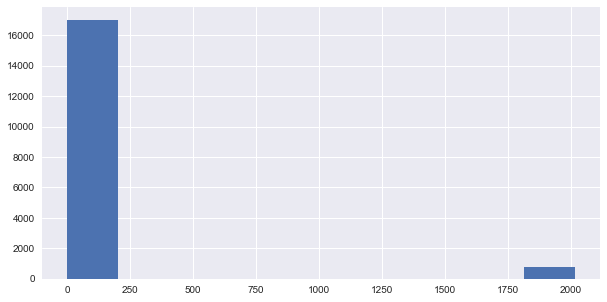

In [49]:
kc_df.yr_renovated.hist(figsize = (10,5))

It can be seen visually here as indicated by the unique value count percentages showed above, that a majority of the homes in the King County dataset have not been renovated.

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


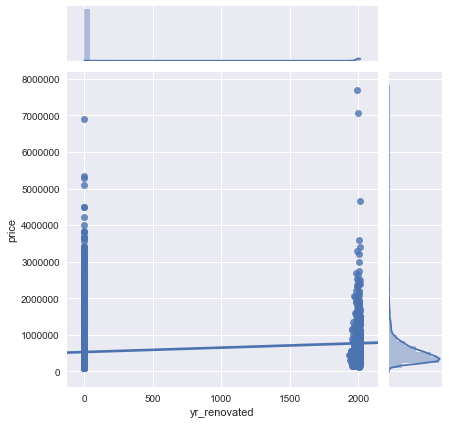

In [50]:
sns.jointplot(x='yr_renovated', y='price', label='yr_renovate', data=kc_df, kind = 'reg')

Again, it can be seen here that many homes have not been renovated in the top histogram.  The scatterplot and slope show only a slight correlation between year of renovation and price of home.

#### Take another look at the 5 Point Statistics

In [51]:
kc_df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

#### What is the percent of missing yr_renovated values?

In [52]:
sum(kc_df.yr_renovated.isna())/len(kc_df)

0.17789507802009538

Finding a relationship between this feature and others in the dataset would be very difficult.  In this respect,
to use the mean as the year 83 is not realistic.  Given the possible correlation between yr_renovated and the target (e.g., price) in current pricing it would not be reasonable to allocate the percent of missing yr_renovated values as this may skew the data.

Knowing that the percent of yr_renovated missing values is quite high and considering the above quartile distribution the most realistic choice would be to replace the missing values with 0.

Finally, given the range of yr_renovated is so wide and such a high percent of the homes have not been renovated or there is no record of renovation, it makes sense to also make this a category with a 0 (not renovated) or 1 (renovated).

#### Replace the yr_renovated missing values with 0 and renovated or not renovated

In [53]:
kc_df.yr_renovated.replace(np.NaN, 0.0, inplace=True)

In [54]:
# Change yr_renovated feature to renovated, using a while statement starting with i = the max yr_renovated value
# for each yr_renovated value greater than 0, replace renovated value with 1.  Repeat until i is no longer greater than 0.

kc_df['renovated'] = kc_df.yr_renovated
i = 2015
while i > 0:
    kc_df.renovated = kc_df.renovated.replace(i,1)
    i -= 1

In [55]:
# What are the new renovated value?  Should be 0 or 1.

kc_df.renovated.unique()

array([0., 1.])

In [56]:
# What are the renovated value counts?

kc_df.renovated.value_counts()

0.0    20853
1.0      744
Name: renovated, dtype: int64

In [57]:
# Drop the old yr_renovated feature from the dataset.

kc_df.drop("yr_renovated", axis=1, inplace=True)

#### How did sqft_living space and price change for renovated houses that were sold mulitple times

In [58]:
# Findout what homes have been renovated and groupby id feature that is specific to each home.

recurring = pd.concat(g for _, g in kc_df.groupby('id') if len(g)>1)
recurring.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0.0,3,...,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,0.0,0.0
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,3,...,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,0.0,0.0
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,3,...,840,0.0,1925,98055,47.4840,-122.211,1480,6969,0.0,0.0
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,3,...,840,0.0,1925,98055,47.4840,-122.211,1480,6969,0.0,0.0
11421,109200390,2014-08-20,245000.0,3,1.75,1480,3900,1.0,0.0,4,...,1480,0.0,1980,98023,47.2977,-122.367,1830,6956,0.0,0.0


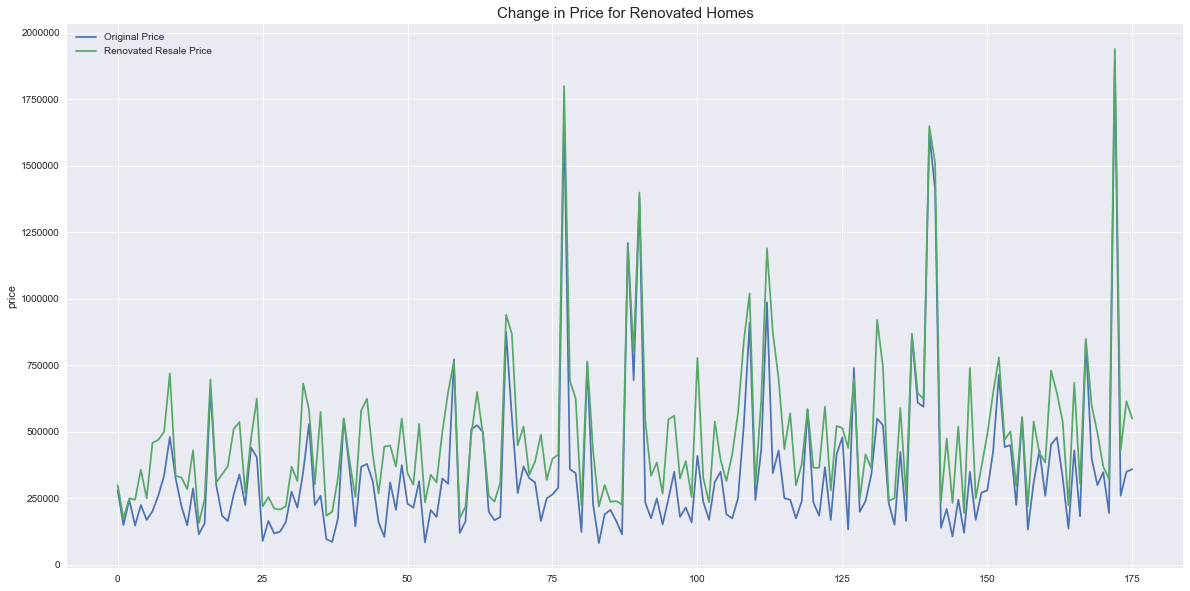

Average increase in Price After Renovated 28 %
Change in Sqft_Living after Renovated 0 %


In [59]:
duplicates = kc_df[kc_df.id.duplicated(keep=False)]
sqft = duplicates.groupby('id')['sqft_living']
dup_prices = duplicates.groupby('id')['price']

plt.figure(figsize=(20,10))
sns.lineplot(range(len(dup_prices)), dup_prices.first(), label='Original Price')
sns.lineplot(range(len(dup_prices)), dup_prices.last(), label='Renovated Resale Price')
plt.title('Change in Price for Renovated Homes', fontdict={'fontsize': 15})
plt.legend()
plt.show()

print('Average increase in Price After Renovated', round((1-(dup_prices.first().mean()/dup_prices.last().mean()))*100), '%')
print('Change in Sqft_Living after Renovated', round((1-(sqft.first().mean()/sqft.last().mean()))*100), '%')


For the homes that have been renovated and resold the average sale price increased 28%; however, the renovations did not increase living space.  Note this answers one of the initial "questions to think about" during Scrub and EDA process.

### The house with 33 bedrooms

Pull up the data specific to the 33 bedroom house.

In [60]:
kc_df.loc[kc_df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,...,1040,580.0,1947,98103,47.6878,-122.331,1330,4700,0.0,0.0


There isn't a feasible way to have 33 bedrooms and 1.75 bathrooms in a home with 1620 sqft of living space.  This is very likely an outlier and possibly causing some skewness.  Drop this from the dataset.

In [61]:
kc_df.drop(labels = kc_df.loc[kc_df.bedrooms == 33].index, inplace = True)
kc_df.bedrooms.describe()

count    21596.000000
mean         3.371828
std          0.904114
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

### Take quick look at other features (e.g., bathrooms, bedrooms, sqft_lot and sqft_lot15)

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


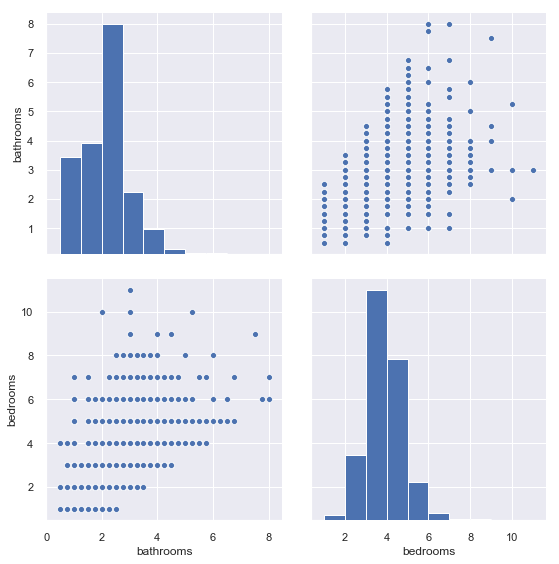

In [62]:
sns.set()
cols = ['bathrooms','bedrooms']
sns.pairplot(kc_df[cols], size = 4)
plt.show();

Distribution appears to be somewhat normal for bedrooms and is skewed for bathrooms.  Consider categorical after runnig heat map and multicollinearity.  

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


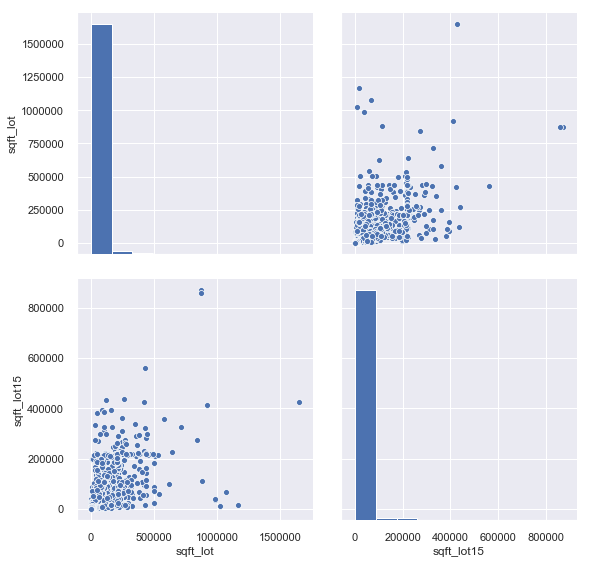

In [63]:
sns.set()
cols = ['sqft_lot','sqft_lot15']
sns.pairplot(kc_df[cols], size = 4)
plt.show();

Each appear heavily skewed and compared to each other there is concentration of homes the smaller the lot size.  Evaluate further in heat map and multicollinearity test.

### Zipcode, Lat and Long

In [64]:
# How many zipcodes are there in the dataset?

kc_df.zipcode.nunique()

70

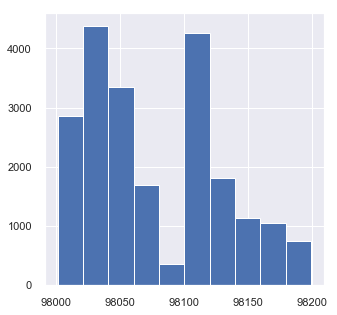

In [65]:
# What does the distibution of zipcodes look like visually with a histogram?

kc_df.zipcode.hist(figsize = (5,5))

This distribution shows that there are definitely zip codes with many homes compared to other zip codes.

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


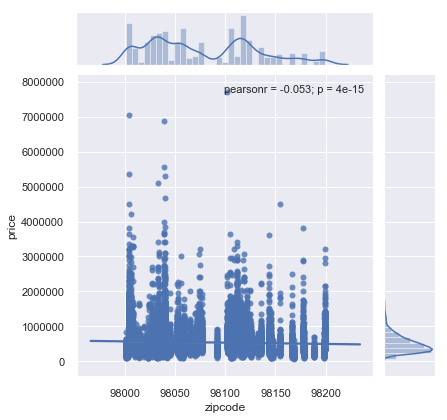

In [66]:
plot = sns.jointplot(x='zipcode', y='price', label='zipcode', data=kc_df, kind = 'reg')
plot.annotate(stats.pearsonr)
plt.show()

Again, there are many zip codes and at first glance there seems to be negative correlation between zipcode and price given the slight downward slope.  The pearsonr is also negative which is another indication of negative correlation.  However, given location is generally assumed to be somewhat indicative of home prices the decision is to further investigate in the Explore/Evaluate phase.

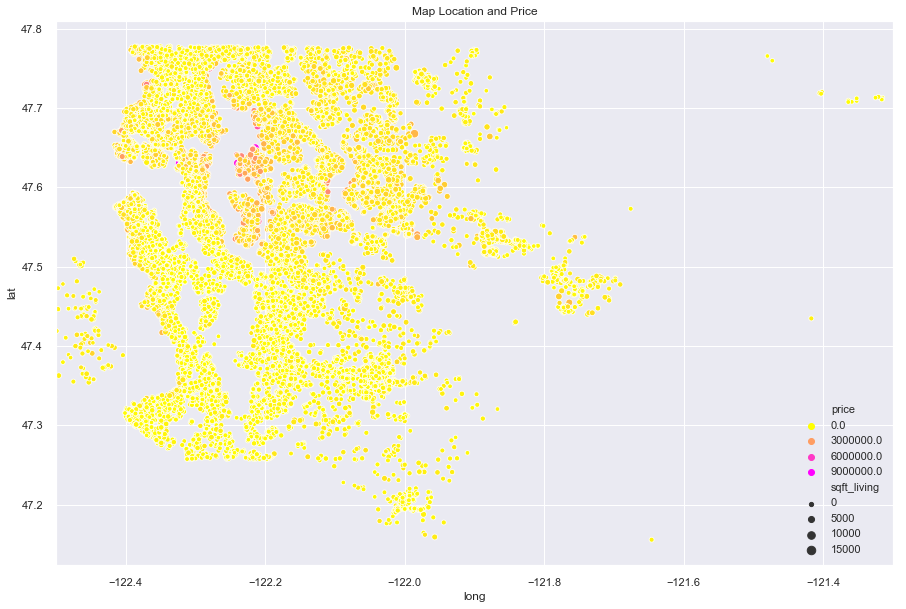

In [67]:
plt.figure(figsize = (15,10))
sns.scatterplot(kc_df.long, kc_df.lat, hue=kc_df.price, size=kc_df.sqft_living, palette='spring_r')
plt.xlim(-122.5, -121.3)
plt.title("Map Location and Price")
plt.show()

The jointplot for zipcode and the scatterplot for lat and long show a very wide range of prices and not necessary centrally located.

### Before moving on take another look at info

In [68]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
viewed           21596 non-null float64
renovated        21596 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 4.2

#### Confirm that there are no longer missing values

In [69]:
kc_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
viewed           0
renovated        0
dtype: int64

### Take a look at the Target Variable, price

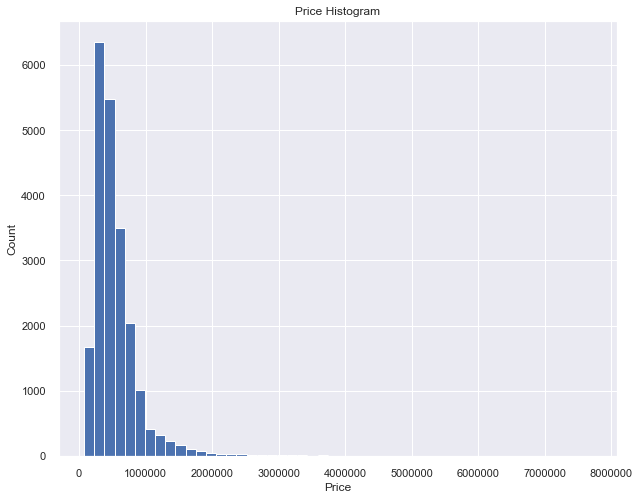

In [70]:
plt.subplots(figsize = (10,8))
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Histogram')
kc_df.price.hist(bins=50)

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


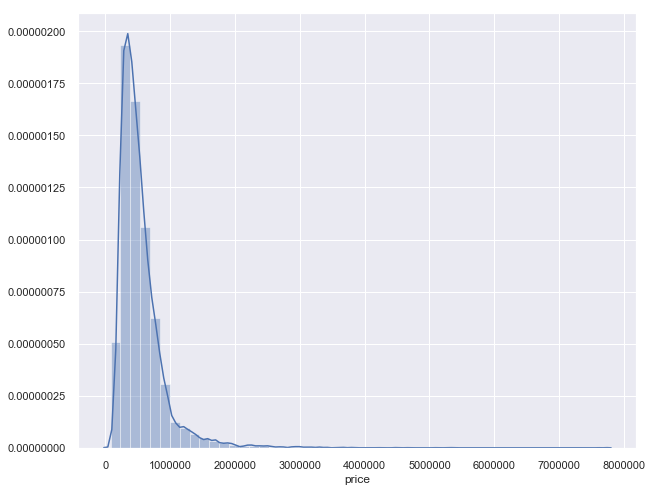

In [71]:
plt.subplots(figsize = (10,8))
sns.distplot(kc_df['price']);

The price of homes is not normally distributed and is positively skewed.  Based on the range of prices and the skewedness there are most likely definite outliers with the lowest price of 78,000, an average price of 540,296 and a maximum price of 7,700,000.

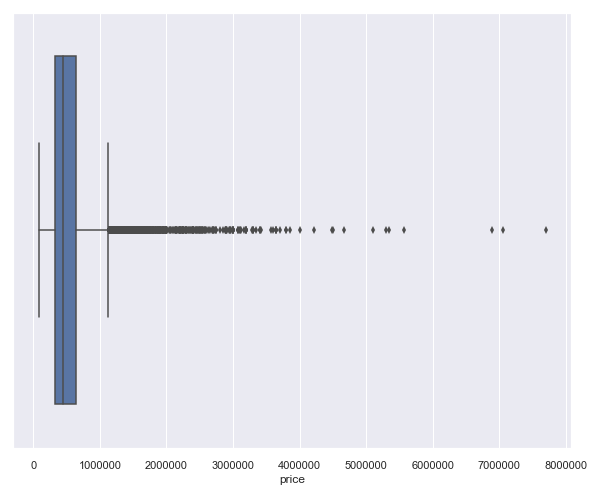

In [72]:
plt.subplots(figsize = (10,8))
sns.boxplot(kc_df['price']);

Boxplot confirms that there are outliers which would explain the skewedness.  Consider transformation during the normalization and scale process to help with this.

# Explore/Evaluate the Data

## 3.1 Check correlation between features and price using a Heat Map

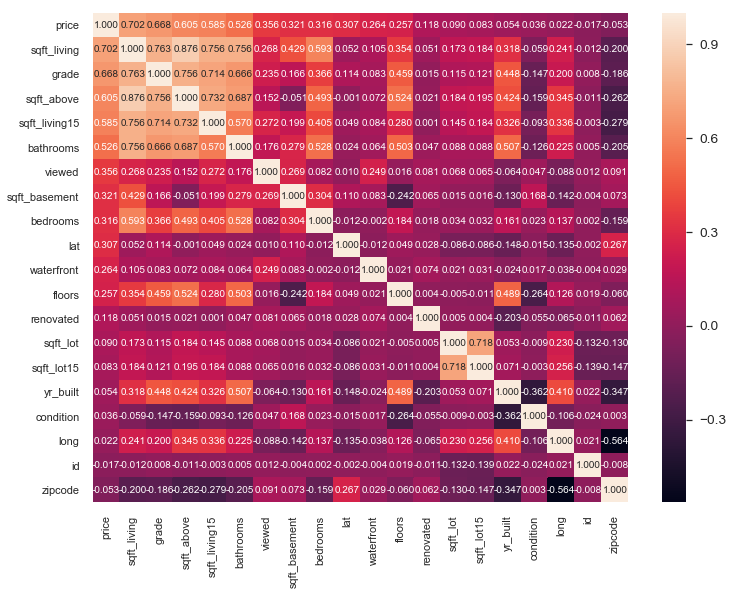

In [73]:
f, ax = plt.subplots(figsize=(12,9))
k = 21
corrmat = kc_df.corr()
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(kc_df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, annot = True, fmt = '.3f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

The feature variables that have a strong positive correlation (e.g., > 0.50) with the target variable, price, are:

1.)  sqft_living

2.)  grade

3.)  sqft_above

4.)  sqft_living15

5.)  bathrooms

Keep these feature variables in the modeling to continue evaluating their influence on price.

There is very low correlation between price and each of the location specific variables (e.g., zipcode, lat and long).  Not prepared to drop these features as traditionally location is an important decision factor when buying a home.

The homes that have been renovated don't appear to have a strong correlation with price.  We do know from scrubbing the data that the sqft_living space did not increase as a result of renovation.

Revisit date as times series.

## 3.2 Check for multicollinearity of features


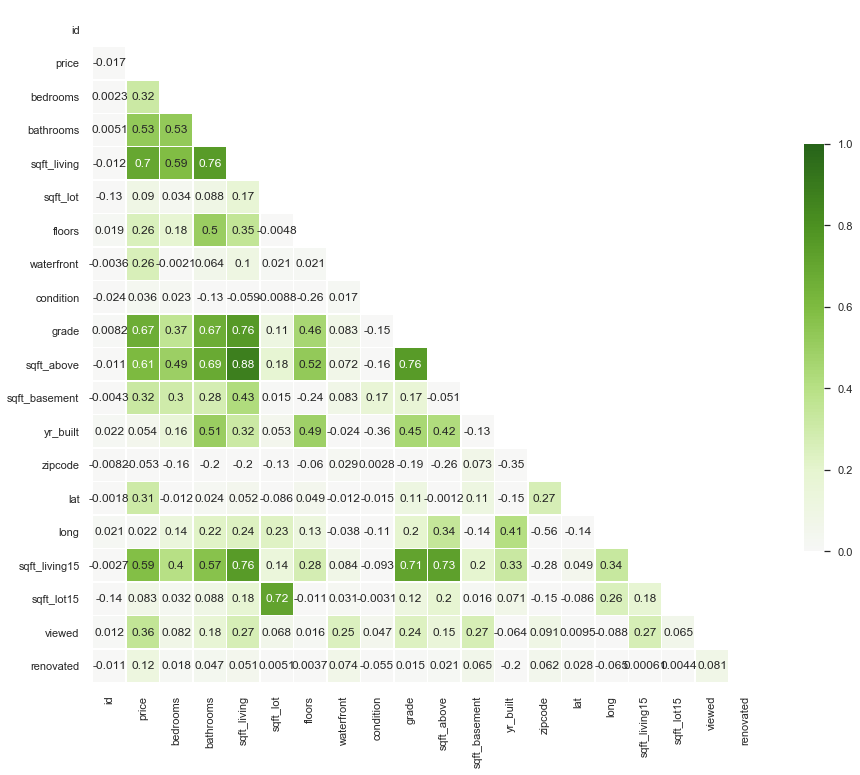

In [74]:
sns.set(style = "white") # Set the style of the visualization

corr = kc_df.corr() # Set the covariance matrix

# Generate a mask the size of the covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap='PiYG', vmin=0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sqft_above and sqft_living are highly correlated.  To deal with this, the sqft_above will be removed from the dataset.  Additionally, sqft_basement will be removed since during the scrub process it was determined that the basement sqft is included in sqft_living.  

In [75]:
# Remove sqft_above and sqft_basement from the dataset.
kc_df.drop(['sqft_above', 'sqft_basement'], axis = 1, inplace = True)

ID is no longer needed, remove it from the dataset.

In [76]:
kc_df.drop('id', axis = 1, inplace = True)

## 3.3 Examine Potential Outliers using boxplots and feature details

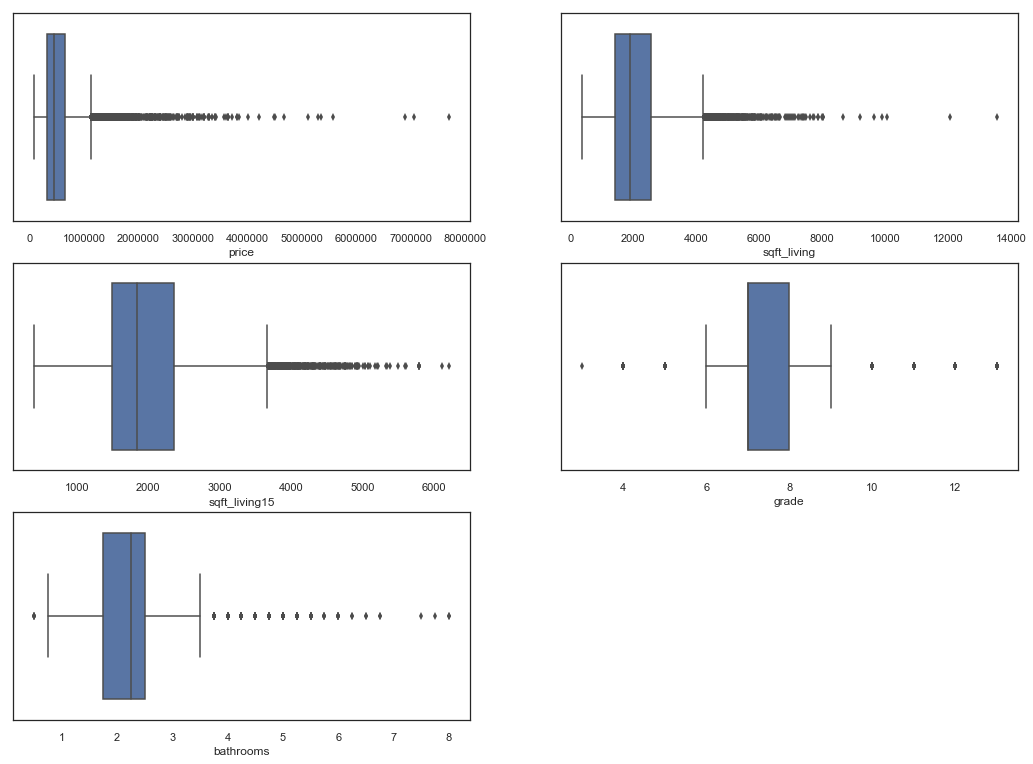

In [77]:
plt.figure(figsize=(18,13))
plt.subplot(321)
sns.boxplot(kc_df.price)
plt.subplot(322)
sns.boxplot(kc_df.sqft_living)
plt.subplot(324)
sns.boxplot(kc_df.grade)
plt.subplot(323)
sns.boxplot(kc_df.sqft_living15)
plt.subplot(325)
sns.boxplot(kc_df.bathrooms)

#### Do the homes with price > = $4M appear to outliers

In [78]:
kc_df.loc[kc_df.price >= 4000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
1162,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,3,12,1999,98033,47.6767,-122.211,3430,26788,1.0,0.0
1313,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1.0,4,12,1991,98040,47.5631,-122.210,4320,24619,0.0,0.0
1446,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0.0,3,12,2009,98004,47.6232,-122.220,4600,21750,1.0,0.0
2624,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1.0,3,12,2004,98155,47.7493,-122.280,3030,23408,1.0,0.0
3910,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,3,11,1940,98004,47.6500,-122.214,3930,25449,1.0,1.0
4145,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0.0,3,12,2008,98039,47.6151,-122.224,3140,15996,0.0,0.0
4407,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,3,13,2001,98039,47.6289,-122.233,3560,24345,0.0,0.0
7245,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,4,13,1910,98102,47.6298,-122.323,3940,8800,1.0,1.0
8085,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,3,12,1983,98040,47.5570,-122.210,3270,10454,1.0,1.0
8629,2014-06-18,4490000.0,4,3.00,6430,27517,2.0,0.0,3,12,2001,98004,47.6208,-122.219,3720,14592,0.0,0.0


All of these homes look to be outliers but also comparable; however, given this is the target variable none of these data points will be eliminated at this time.

#### Based on boxplot, take a look at the homes that have > 4000 sqft_living

In [79]:
kc_df.loc[kc_df.sqft_living > 4000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,98053,47.6561,-122.005,4760,101930,0.0,0.0
41,2014-08-11,775000.0,4,2.25,4220,24186,1.0,0.0,3,8,1984,98166,47.4450,-122.347,2410,30617,0.0,0.0
70,2014-09-12,1040000.0,5,3.25,4770,50094,1.0,0.0,4,11,1973,98005,47.6525,-122.160,3530,38917,0.0,0.0
115,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,3,8,1900,98117,47.6981,-122.368,1830,6350,0.0,0.0
153,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,0.0,3,12,2006,98006,47.5620,-122.162,3160,9750,1.0,0.0
185,2014-11-21,1100000.0,5,3.00,4090,12850,1.0,0.0,4,10,1986,98033,47.6627,-122.188,2540,10270,1.0,0.0
239,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0.0,4,9,1965,98003,47.3376,-122.324,2600,13988,1.0,0.0
269,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0.0,3,11,1982,98004,47.6312,-122.223,3890,20060,1.0,0.0
270,2014-10-07,1370000.0,4,4.75,5310,57346,2.0,0.0,4,11,1989,98077,47.7285,-122.042,4180,47443,0.0,0.0
300,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,1.0,3,10,2002,98074,47.6053,-122.077,4550,19508,1.0,0.0


The homes with more than 4000 sqft of living space are quite varied when you look at the other features.  Given the percent of homes greater than 4000 sqft is less than 5% of the original size of the dataset, these homes will be dropped from the King County dataset.

In [80]:
# Drop homes with sqft_living > 4000

kc_df.drop(labels = kc_df.loc[kc_df.sqft_living > 4000].index, inplace = True)

#### Based on the boxplot, take a look at the homes that have > 4000 sqft_living15

In [81]:
kc_df.loc[kc_df.sqft_living15 > 4000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
21,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,3,9,1968,98040,47.5316,-122.233,4110,20336,1.0,0.0
792,2014-07-09,1360000.0,4,3.50,3550,11000,1.0,0.0,3,11,1999,98006,47.5506,-122.134,4100,10012,1.0,0.0
884,2014-06-04,1270000.0,5,2.50,3200,17204,1.0,0.0,3,7,1952,98004,47.6209,-122.222,4090,15732,0.0,0.0
1122,2014-06-25,1200000.0,4,1.75,3990,13470,2.0,0.0,3,11,2006,98059,47.5305,-122.131,5790,13709,0.0,0.0
1528,2014-08-27,1250000.0,4,3.75,3830,41263,2.0,0.0,4,11,1990,98077,47.7237,-122.042,5600,56568,0.0,0.0
2639,2014-09-29,1270000.0,4,2.75,3200,13729,2.0,0.0,3,11,1984,98005,47.6402,-122.171,4050,16921,0.0,0.0
3033,2014-12-19,1800000.0,4,3.50,3930,39098,2.0,0.0,3,12,1999,98005,47.6399,-122.158,4250,38682,0.0,0.0
3375,2014-07-28,970000.0,4,4.50,3890,5906,2.0,0.0,3,11,2004,98029,47.5426,-121.995,4170,6052,1.0,0.0
3379,2015-04-29,783350.0,4,2.50,3290,35001,2.0,0.0,3,10,1991,98077,47.7231,-122.038,4090,40371,0.0,0.0
4132,2015-01-16,700000.0,3,2.50,3110,11727,2.0,0.0,3,9,2002,98065,47.5445,-121.871,4240,13353,1.0,0.0


In [82]:
len(kc_df.loc[(kc_df.sqft_living15 > 4000)])

52

There are a minimal number of homes with sqft_living15 > 4000, they will be dropped.

In [83]:
kc_df.drop(labels = kc_df.loc[kc_df.sqft_living15 > 4000].index, inplace = True)

#### Take a look at homes with grade < 6 and > 9

In [84]:
kc_df.loc[kc_df.grade < 6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
36,2014-05-28,550000.0,4,1.00,1660,34848,1.0,0.0,1,5,1933,98052,47.6621,-122.132,2160,11467,0.0,0.0
166,2015-02-19,269950.0,2,1.75,1340,7250,1.0,0.0,5,5,1949,98198,47.4080,-122.327,1830,9750,0.0,0.0
263,2015-04-28,425000.0,2,1.00,770,5040,1.0,0.0,3,5,1930,98144,47.5964,-122.299,1330,2580,0.0,0.0
264,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,5,5,1936,98070,47.4683,-122.438,1230,14267,1.0,0.0
350,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,3,4,1967,98014,47.6750,-121.854,1300,19207,0.0,0.0
411,2014-07-16,517534.0,2,1.00,833,143947,1.0,0.0,3,5,2006,98070,47.3889,-122.482,1380,143947,0.0,0.0
465,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,2,4,1912,98014,47.6499,-121.909,1200,7500,0.0,0.0
478,2015-04-06,315000.0,2,1.00,630,6550,1.0,0.0,3,5,1918,98126,47.5486,-122.380,1420,6550,0.0,0.0
523,2014-11-05,235000.0,4,1.50,1690,11054,1.0,0.0,4,5,1930,98055,47.4667,-122.215,1690,9040,0.0,0.0
700,2015-04-07,795000.0,2,1.00,1380,5000,1.5,0.0,3,5,1905,98106,47.5708,-122.359,1500,5000,1.0,0.0


In [85]:
kc_df.loc[kc_df.grade > 9]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
66,2014-09-09,975000.0,4,2.50,2720,11049,2.0,0.0,3,10,1989,98004,47.5815,-122.192,2750,11049,0.0,0.0
75,2014-11-05,832500.0,4,4.00,3430,35102,2.0,0.0,4,10,1986,98075,47.5822,-121.987,3240,35020,0.0,0.0
79,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,2002,98010,47.3420,-122.025,3350,39750,0.0,0.0
91,2015-03-11,1100000.0,5,2.75,3520,6353,2.0,0.0,4,10,2001,98199,47.6506,-122.391,2520,6250,0.0,0.0
108,2015-03-05,680000.0,4,2.50,3140,28037,2.0,0.0,4,10,1991,98077,47.7304,-122.082,2990,35001,0.0,0.0
162,2015-03-04,900000.0,3,2.50,3400,16603,2.0,0.0,3,10,2000,98075,47.6012,-122.023,3400,12601,0.0,0.0
173,2015-01-16,917500.0,4,2.50,3880,35003,2.0,0.0,3,10,1984,98033,47.6477,-122.182,3740,35230,0.0,0.0
220,2014-08-22,686000.0,4,2.50,2760,6440,2.0,0.0,3,10,1999,98075,47.5836,-122.026,3070,8127,0.0,0.0
235,2014-06-10,1030000.0,5,4.00,3760,28040,2.0,0.0,3,10,1983,98033,47.6489,-122.183,3430,35096,0.0,0.0
238,2014-07-01,800000.0,3,3.50,3830,221284,2.0,0.0,3,10,1993,98077,47.7641,-122.023,2920,148539,0.0,0.0


Not prepared to drop over 1200 homes that appear to be outliers given grade was one of the top 5 highly correclated with price when running the Heat Map.

#### Take a look at the homes that have more than 7 bathrooms

In [86]:
kc_df.loc[(kc_df.bathrooms > 7)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated


In [87]:
kc_df.bathrooms.describe()

count    20762.000000
mean         2.055221
std          0.701346
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          5.750000
Name: bathrooms, dtype: float64

No longer properties with more than 7 bathrooms; therefore, no need to drop.

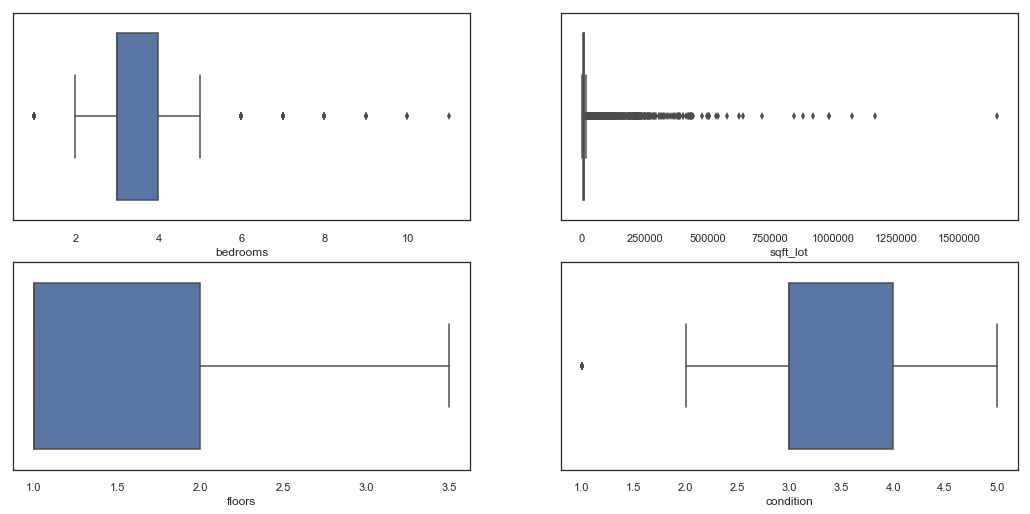

In [88]:
plt.figure(figsize=(18,13))
plt.subplot(321)
sns.boxplot(kc_df.bedrooms)
plt.subplot(322)
sns.boxplot(kc_df.sqft_lot)
plt.subplot(323)
sns.boxplot(kc_df.floors)
plt.subplot(324)
sns.boxplot(kc_df.condition)

#### Resulting from the boxplot, look at bedrooms < 2

In [89]:
kc_df.loc[(kc_df.bedrooms < 2)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
154,2014-05-16,350000.0,1,1.00,700,5100,1.0,0.0,3,7,1942,98115,47.6790,-122.300,1010,5100,0.0,0.0
264,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,5,5,1936,98070,47.4683,-122.438,1230,14267,1.0,0.0
350,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,3,4,1967,98014,47.6750,-121.854,1300,19207,0.0,0.0
465,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,2,4,1912,98014,47.6499,-121.909,1200,7500,0.0,0.0
648,2014-11-18,157000.0,1,1.00,870,26326,1.0,0.0,3,6,1939,98198,47.4152,-122.300,1250,10608,0.0,0.0


In [90]:
len(kc_df.loc[(kc_df.bedrooms < 2)])

196

This is a very small percent (less than 1%) of the King County data.  Assume these are outliers and drop.

In [91]:
kc_df.drop(labels = kc_df.loc[kc_df.bedrooms < 2].index, inplace = True)

In [92]:
kc_df.loc[(kc_df.bedrooms > 5)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
209,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0.0,3,7,1920,98133,47.7067,-122.343,1560,1312,0.0,1.0
232,2014-11-21,315000.0,6,2.75,2940,7350,1.0,0.0,3,8,1978,98023,47.3103,-122.339,2120,8236,0.0,0.0
331,2015-04-16,279000.0,6,1.75,2240,11180,2.0,0.0,4,7,1955,98198,47.4200,-122.323,1590,7955,0.0,0.0
558,2015-04-27,750000.0,6,1.75,2750,9563,2.0,0.0,4,8,1973,98052,47.6368,-122.097,2040,9563,0.0,0.0
717,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,3,7,1937,98125,47.7142,-122.286,1120,8242,0.0,1.0
718,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,3,7,1937,98125,47.7142,-122.286,1120,8242,0.0,1.0
784,2014-12-02,650000.0,6,2.75,3610,10003,1.5,0.0,4,8,1966,98008,47.6261,-122.125,2560,10004,0.0,0.0
833,2014-09-11,662500.0,6,2.25,2450,25600,1.0,0.0,3,7,1957,98008,47.6061,-122.117,1850,10230,1.0,0.0
1134,2015-01-05,420000.0,7,3.00,2940,8624,1.0,0.0,3,8,1977,98155,47.7555,-122.307,1850,8031,0.0,0.0
1160,2014-08-13,435000.0,6,3.50,2400,8620,2.0,0.0,3,8,1987,98034,47.7152,-122.162,1940,7350,0.0,0.0


In [93]:
len(kc_df.loc[(kc_df.bedrooms > 5)])

264

Before deleting bedrooms > 5 run full regression

#### What are the details for sqft_lot > 250000 based on boxplot visualization?

In [94]:
kc_df.loc[(kc_df.sqft_lot > 250000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
145,2014-12-03,921500.0,4,2.50,3670,315374,2.0,0.0,4,9,1994,98077,47.7421,-122.026,2840,87991,0.0,0.0
928,2014-08-08,390000.0,4,3.00,2570,262018,1.0,0.0,3,7,1988,98058,47.4417,-122.090,2260,19811,0.0,0.0
1701,2014-12-08,617000.0,3,1.75,3020,360241,2.0,0.0,3,8,1992,98092,47.2662,-122.088,1890,209959,0.0,0.0
1717,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0.0,4,6,1920,98022,47.2313,-122.023,2560,425581,1.0,0.0
1772,2014-05-05,210000.0,3,1.00,1340,306848,1.0,0.0,3,5,1953,98019,47.7534,-121.912,1800,128066,0.0,0.0
2755,2014-06-23,230000.0,3,1.00,1530,389126,1.5,0.0,4,7,1919,98022,47.1776,-122.011,1768,42148,0.0,0.0
2869,2014-05-29,302000.0,2,1.00,900,423838,1.0,0.0,5,6,1925,98022,47.2280,-122.088,1810,94960,1.0,0.0
2958,2014-08-12,474000.0,2,1.00,1050,403365,1.0,0.0,5,6,1905,98022,47.2221,-122.059,1760,108900,1.0,0.0
2962,2014-11-19,999000.0,3,2.75,2830,505166,1.0,1.0,4,8,1962,98070,47.3782,-122.514,2120,21988,1.0,0.0
3520,2015-03-19,350000.0,3,1.75,1980,273556,1.0,0.0,3,6,1956,98042,47.4012,-122.110,2180,217799,0.0,1.0


In [95]:
len(kc_df.loc[(kc_df.sqft_lot > 250000)])/len(kc_df)

0.0040844111640571815

The homes with sqft_lots greater than 250,000 compared to the sqft lot size of the closest 15 neighbors seem to be likely outliers.  The percent of homes greater than 250,000 is less than 1%, therefore removing these likely outliers is not significant.

In [96]:
# Drop this set of homes with sqft_lot size greater than or equal to 250000.

kc_df.drop(labels = kc_df.loc[kc_df.sqft_lot > 250000].index, inplace = True)


#### Are the homes with condition equal to 1 outliers?

In [97]:
kc_df.loc[(kc_df.condition == 1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
36,2014-05-28,550000.0,4,1.00,1660,34848,1.0,0.0,1,5,1933,98052,47.6621,-122.132,2160,11467,0.0,0.0
380,2014-09-16,270000.0,2,1.50,1380,209959,1.0,0.0,1,6,1954,98011,47.7461,-122.195,3130,19868,0.0,0.0
397,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0.0,1,8,1962,98006,47.5722,-122.129,2000,10071,0.0,0.0
1440,2014-11-07,352950.0,3,1.00,1760,3000,1.5,0.0,1,6,1900,98103,47.6598,-122.348,1320,1266,0.0,0.0
2221,2015-03-16,535000.0,2,1.00,920,9000,1.0,0.0,1,6,1954,98033,47.6831,-122.189,1760,8400,0.0,0.0
3002,2014-12-31,441000.0,4,1.50,1100,3300,1.0,0.0,1,7,1919,98122,47.6033,-122.295,2020,4000,0.0,0.0
3199,2014-05-09,255000.0,2,1.00,810,7980,1.0,0.0,1,6,1928,98146,47.4890,-122.337,1440,7980,0.0,0.0
3971,2015-05-11,210000.0,2,1.00,990,8140,1.0,0.0,1,6,1910,98116,47.5828,-122.382,2150,5000,0.0,0.0
7369,2014-11-07,295000.0,3,1.50,720,7450,1.0,0.0,1,5,1924,98126,47.5840,-122.375,2600,7360,1.0,0.0
12294,2015-01-28,196000.0,3,2.25,1510,9600,1.0,0.0,1,7,1966,98028,47.7758,-122.238,1870,10681,0.0,0.0


In [98]:
len(kc_df.loc[(kc_df.condition == 1)])

25

There are only 25 homes with condition equal to 1.  Assume they are outliers given the amount is insignificant compared to size of data set.

In [99]:
kc_df.drop(labels = kc_df.loc[kc_df.condition == 1].index, inplace = True)

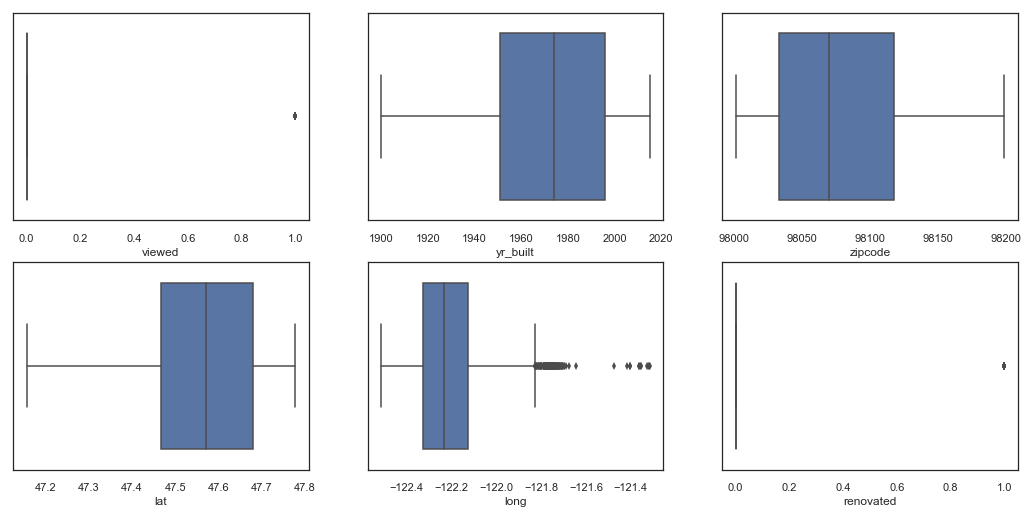

In [100]:
plt.figure(figsize=(18,13))
plt.subplot(331)
sns.boxplot(kc_df.viewed)
plt.subplot(332)
sns.boxplot(kc_df.yr_built)
plt.subplot(333)
sns.boxplot(kc_df.zipcode)
plt.subplot(334)
sns.boxplot(kc_df.lat)
plt.subplot(335)
sns.boxplot(kc_df.long)
plt.subplot(336)
sns.boxplot(kc_df.renovated)

#### Look at viewed

In [101]:
len(kc_df.loc[kc_df.viewed == 1])

1738

This is a variable that is either yes or no, 1 or 0, respectively.  Given there are quite a number properties viewed not considering them as outliers.

#### Look at long < -121.6

In [102]:
len(kc_df.loc[(kc_df.long > -121.6)])

15

Not convinced to remove any data that may appear to be outliers based on location features.  

Research shows that housing prices are driven by location.  Generally, one of the most common drivers is recent sales within a certain distance.  Joining the lat and long features to exact location may make sense when getting looking at the correlation to price.

#### Look at renovated

In [103]:
len(kc_df.loc[kc_df.renovated == 1])

682

This is a variable that is either yes or no, 1 or 0, respectively.  Given there is a fair amount of properties that have been renovated not considering them as outliers.

#### Yr_built, zipcode and lat don't appear to have outliers when looking at the boxplot visualizations. 

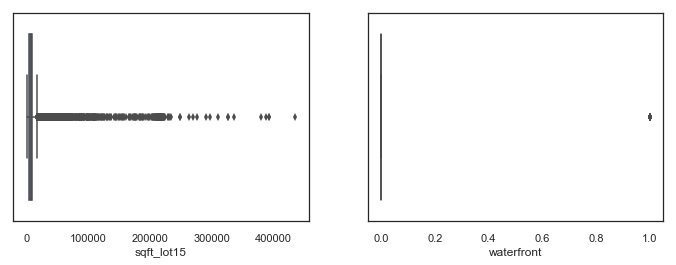

In [104]:
plt.figure(figsize=(18,13))
plt.subplot(331)
sns.boxplot(kc_df.sqft_lot15)
plt.subplot(332)
sns.boxplot(kc_df.waterfront)

#### Sqft_lot15 looks to have outliers

Start by looking at sqft_lot15 > 250,000

In [105]:
kc_df.loc[(kc_df.sqft_lot15 > 250000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,viewed,renovated
1253,2014-07-10,600000.0,2,2.50,2410,102366,1.0,0.0,4,7,1912,98024,47.5629,-121.918,2460,310582,0.0,1.0
3797,2014-08-26,637000.0,4,3.50,3080,118918,2.0,0.0,3,9,2008,98019,47.7721,-121.924,1830,434728,0.0,0.0
8154,2014-12-17,275000.0,2,1.00,900,57063,1.0,0.0,4,6,1938,98045,47.4735,-121.786,1440,268765,0.0,0.0
8756,2014-08-04,550000.0,3,2.50,2920,169448,2.5,0.0,3,9,1990,98022,47.2492,-121.975,2360,326097,0.0,0.0
11171,2014-07-11,319000.0,3,1.75,1640,53400,1.0,0.0,4,7,1966,98070,47.3944,-122.506,1850,380279,0.0,0.0
12481,2015-05-08,399000.0,3,1.75,2170,73616,1.0,0.0,3,7,2008,98092,47.2881,-122.086,1710,297514,0.0,0.0
12656,2014-06-19,335000.0,4,2.00,2030,103672,1.0,0.0,4,7,1969,98022,47.1647,-121.973,1560,325393,0.0,0.0
13428,2015-05-12,536000.0,3,2.75,2290,34548,2.0,0.0,4,7,1984,98042,47.3691,-122.163,399,275299,1.0,0.0
14876,2015-05-08,530000.0,3,3.00,2450,211266,1.5,0.0,3,8,2004,98022,47.2215,-122.067,2300,263492,1.0,0.0
15543,2015-03-11,230000.0,3,1.00,1120,32250,1.0,0.0,4,6,1934,98070,47.4470,-122.482,1010,335289,0.0,0.0


Assume these properties are outliers and drop from the dataset.

In [106]:
len(kc_df.loc[kc_df.sqft_lot15 > 250000])

14

In [107]:
# Drop these property from the dataset.

kc_df.drop(labels = kc_df.loc[kc_df.sqft_lot15 > 250000].index, inplace = True)

#### Waterfront

In [108]:
len(kc_df.loc[kc_df.waterfront == 1])

100

In [109]:
len(kc_df.loc[kc_df.waterfront == 1])/len(kc_df)

0.0048916499535293255

The number of properties that appear to be outliers based on waterfront are less than 1% of the remaining properties in the dataset.  Drop.

In [110]:
kc_df.drop(labels = kc_df.loc[kc_df.waterfront == 1].index, inplace = True)

### Visualize the features with jointplots

Take a look at the features that will be changed to category (e.g., zipcode, lat, long, yr_built, grade, renovated, condition, bedrooms, bathrooms, floors, waterfront, viewed).

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


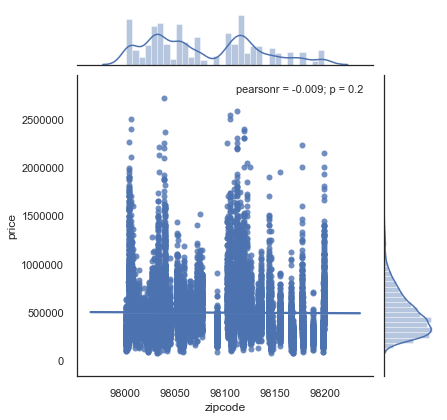

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


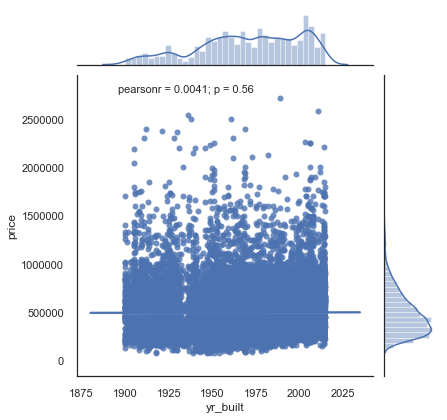

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


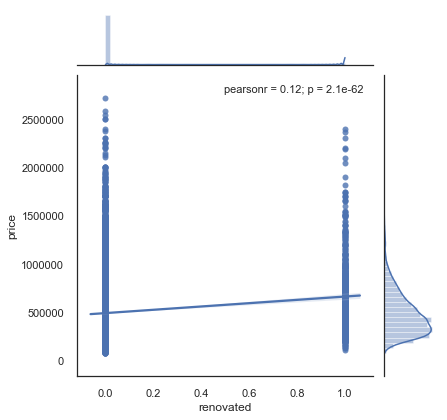

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


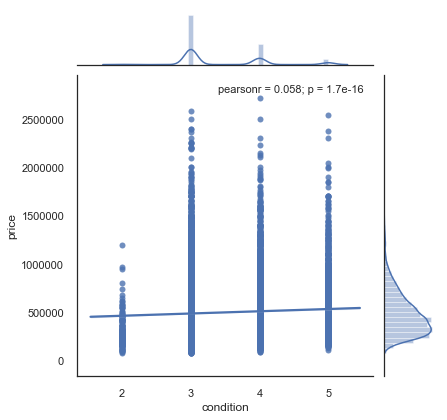

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


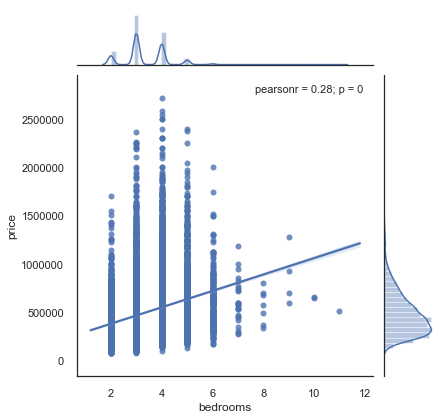

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


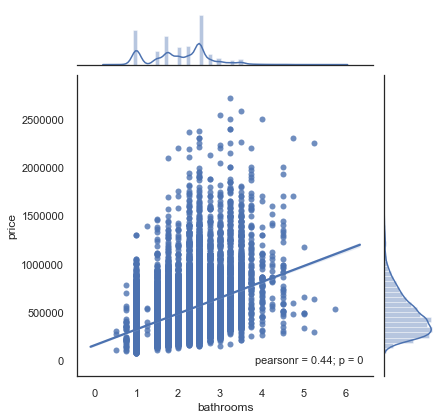

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


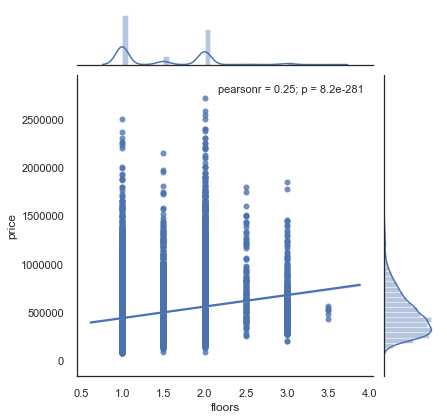

C:\Users\lizak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lizak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lizak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value e

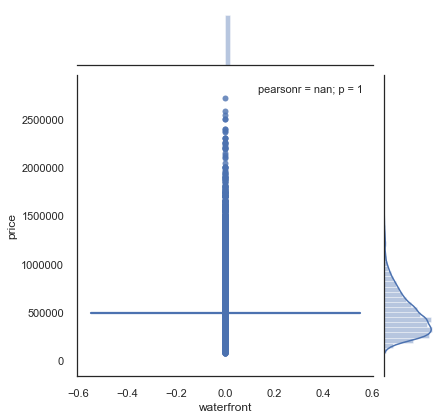

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


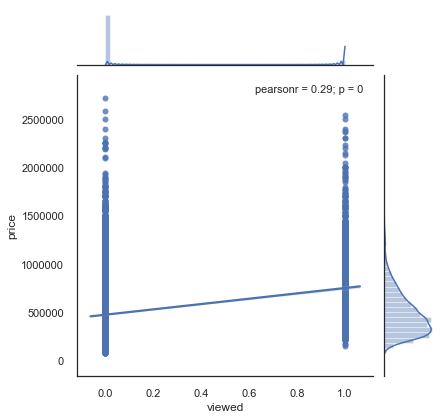

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


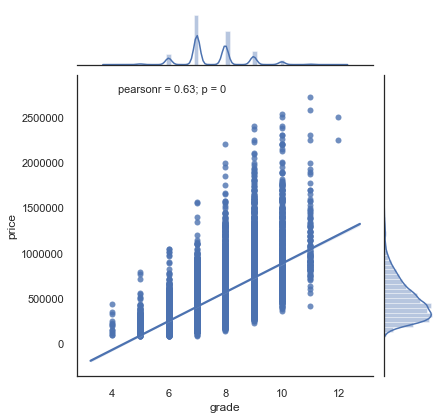

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


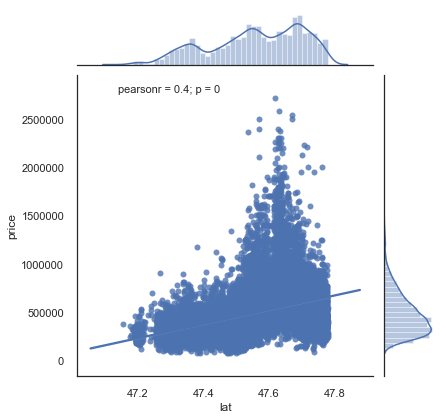

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


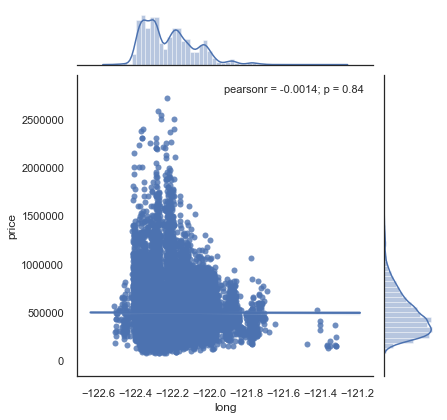

In [111]:
df_cat = kc_df[['zipcode', 'yr_built', 'renovated', 'condition', 'bedrooms', 'bathrooms', 'floors',
                'waterfront', 'viewed', 'grade', 'lat', 'long']]

for column in df_cat:
    plot = sns.jointplot(x=column, y='price', label=column, data=kc_df, kind = 'reg')
    plot.annotate(stats.pearsonr)
    plt.show()

The slopes enforce what the heatmap alluded in that grade looks to be the categorical feature with the strongest positive correlation with price.  Bathrooms and Latitude are two others that have fairly strong positive correlation with price.

Take a look at the continuous features (e.g., sqft_living, sqft_lot, sqft_basement, sqft_living15, sqft_lot15).

In [112]:
df_cont = kc_df[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']]

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


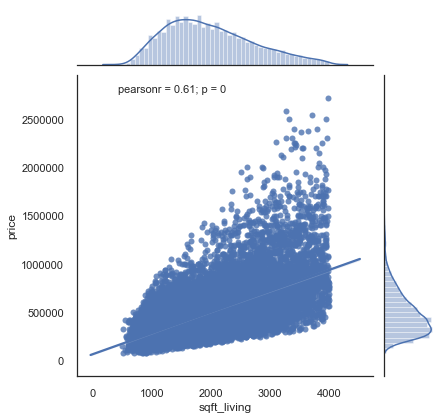

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


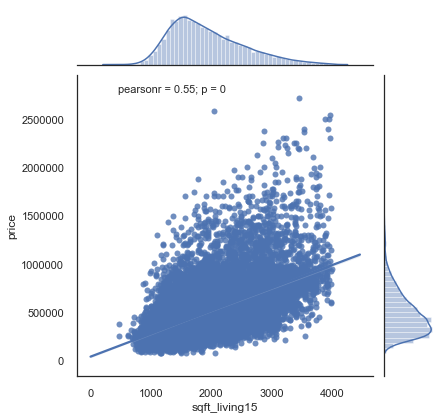

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


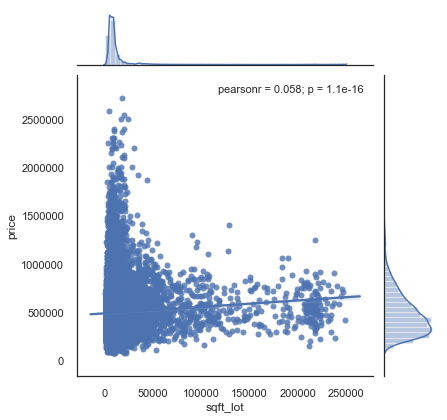

C:\Users\lizak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


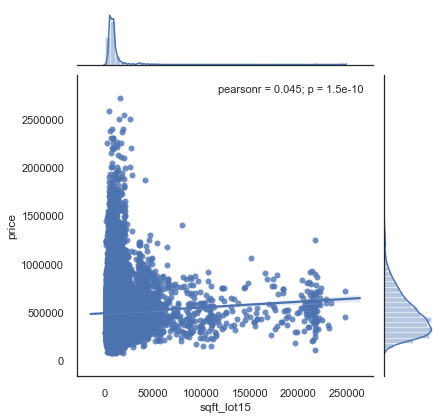

In [113]:
for column in df_cont:
    plot = sns.jointplot(x=column, y='price', label=column, data=kc_df, kind = 'reg')
    plot.annotate(stats.pearsonr)
    plt.show()

The scatter plot and slope confirm that there appears to be a fairly strong positive correlation between price and sqft_living and sqft_living15.  The slope shows that both increase as the price increases within a certain range for each.  The scatter plot also shows there are some definite outliers.

The Pearsonr confirms the correlation coefficient from the Heat Map and the respective p-values are less than 5% which confirms that the correlation coefficient is statistically significant.

The visualizations backup the results of the Heat Map; therefore, make adjustments to the variables as noted above in the Heat Map comments.

#### Based on the heat map & multicollinearity tests along with cleaning some outliers the correlation between features and price didn't significantly change. 

#### Before moving onto one-hot coding and scaling and normalization, eliminate some of the features that show low correlation with price.

In [114]:
# Drop features

kc_df.drop(['condition', 'sqft_lot',
           'sqft_lot15', 'yr_built', 'waterfront'], axis = 1, inplace = True)

In [115]:
kc_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,grade,zipcode,lat,long,sqft_living15,viewed,renovated
0,2014-10-13,221900.0,3,1.00,1180,1.0,7,98178,47.5112,-122.257,1340,0.0,0.0
1,2014-12-09,538000.0,3,2.25,2570,2.0,7,98125,47.7210,-122.319,1690,0.0,1.0
2,2015-02-25,180000.0,2,1.00,770,1.0,6,98028,47.7379,-122.233,2720,0.0,0.0
3,2014-12-09,604000.0,4,3.00,1960,1.0,7,98136,47.5208,-122.393,1360,0.0,0.0
4,2015-02-18,510000.0,3,2.00,1680,1.0,8,98074,47.6168,-122.045,1800,0.0,0.0


### Make Categorical Features Categories

#### Lat and Long

Bin lat and long into 10 seperate buckets and Create Dummy Variables

In [116]:
buckets = 10
bins2 = list(np.linspace(kc_df.long.min(), kc_df.long.max(), num = buckets))
bins1 = list(np.linspace(kc_df.lat.min(), kc_df.lat.max(), num = buckets))
labels = [i for i in range(1,buckets)]

kc_df.lat = pd.cut(kc_df.lat, bins1, labels=labels)
kc_df.lat = kc_df.lat.astype('category')
lat_dummies = pd.get_dummies(kc_df.lat, prefix = 'lat', drop_first=True)

kc_df.long = pd.cut(kc_df.long, bins2, labels=labels)
kc_df.long = kc_df.long.astype('category')
long_dummies = pd.get_dummies(kc_df.long, prefix = 'long', drop_first=True)

kc_df = pd.concat([kc_df,lat_dummies,long_dummies], axis=1)  # Add lat & long dummies to dataframe and remove original
kc_df.drop(['lat','long'], axis=1, inplace=True)

#### Zipcode, yr_built, grade, bedrooms, bathrooms into 'category'

In [117]:
kc_df.zipcode = kc_df.zipcode.astype('category')
kc_df.grade = kc_df.grade.astype('category')
kc_df.bedrooms = kc_df.bedrooms.astype('category')
kc_df.floors = kc_df.floors.astype('category')
kc_df.viewed = kc_df.viewed.astype('category')
kc_df.renovated = kc_df.renovated.astype('category')

In [118]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20343 entries, 0 to 21596
Data columns (total 27 columns):
date             20343 non-null datetime64[ns]
price            20343 non-null float64
bedrooms         20343 non-null category
bathrooms        20343 non-null float64
sqft_living      20343 non-null int64
floors           20343 non-null category
grade            20343 non-null category
zipcode          20343 non-null category
sqft_living15    20343 non-null int64
viewed           20343 non-null category
renovated        20343 non-null category
lat_2            20343 non-null uint8
lat_3            20343 non-null uint8
lat_4            20343 non-null uint8
lat_5            20343 non-null uint8
lat_6            20343 non-null uint8
lat_7            20343 non-null uint8
lat_8            20343 non-null uint8
lat_9            20343 non-null uint8
long_2           20343 non-null uint8
long_3           20343 non-null uint8
long_4           20343 non-null uint8
long_5           20343 n

### One-Hot Encode (Create Dummy Variables) for Categorical Variables (excluding Lat & Long completed above)

In [119]:
# Create dummies
zipcode_dummy = pd.get_dummies(kc_df["zipcode"], prefix='zip')
grade_dummy = pd.get_dummies(kc_df["grade"], prefix='grd')
bedrooms_dummy = pd.get_dummies(kc_df["bedrooms"], prefix='beds')
bathrooms_dummy = pd.get_dummies(kc_df["bathrooms"], prefix='baths')
floors_dummy = pd.get_dummies(kc_df["floors"], prefix='flrs')
viewed_dummy = pd.get_dummies(kc_df["viewed"], prefix='seen')
renovated_dummy = pd.get_dummies(kc_df["renovated"], prefix='reno')

In [120]:
# Remove original Feature columns that are now dummies
kc_df = kc_df.drop(['zipcode', 'bedrooms', 'bathrooms', 'floors', 'viewed', 'renovated', 'grade'], axis=1)

In [121]:
# Add dummies to dataframe
kc_df = pd.concat([kc_df, zipcode_dummy, bedrooms_dummy, bathrooms_dummy, floors_dummy,
                viewed_dummy, renovated_dummy, grade_dummy], axis=1)

In [122]:
kc_df.head()

,date,price,sqft_living,sqft_living15,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,...,reno_1.0,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12
0,2014-10-13,221900.0,1180,1340,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2014-12-09,538000.0,2570,1690,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2015-02-25,180000.0,770,2720,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2014-12-09,604000.0,1960,1360,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2015-02-18,510000.0,1680,1800,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [123]:
# Seen with a value of 1 (property has been viewed).  Confirming that Seen equal to one matches those properties Viewed
# in the Scrub process.
len(kc_df.loc[kc_df['seen_1.0'] == 1])

1635

In [124]:
# Reno with a value of 1 (property has been renovated).  Confirm that Reno equal to one matched the number of properties
# renovated in the Scrub process.
len(kc_df.loc[kc_df['reno_1.0'] == 1])

658

In [125]:
# Keeping both dummy columns for Seen and Reno are not needed.  
kc_df = kc_df.drop(['seen_0.0', 'reno_0.0'], axis=1)

In [126]:
kc_df.head()

,date,price,sqft_living,sqft_living15,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,...,reno_1.0,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12
0,2014-10-13,221900.0,1180,1340,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2014-12-09,538000.0,2570,1690,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2015-02-25,180000.0,770,2720,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2014-12-09,604000.0,1960,1360,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2015-02-18,510000.0,1680,1800,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Normalize & Scale the Data

Normalize the data to bring it to scale.

As noted in the scrub the data process, each of the continuous features (e.g., sqft_living and sqft_living15) along with the target, (e.g., price) appear to be be skewed.  Take another look at the histograms for these variables.

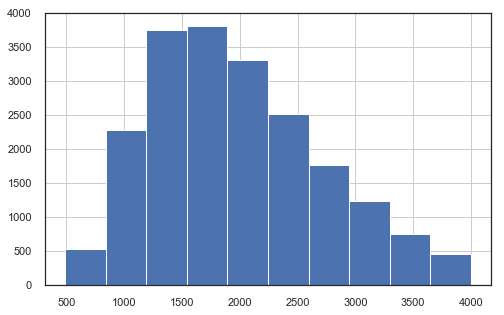

In [127]:
kc_df.sqft_living.hist(figsize = (8,5))

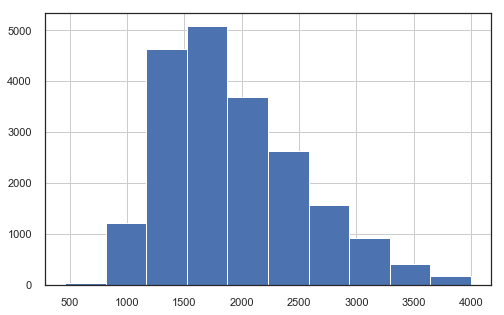

In [128]:
kc_df.sqft_living15.hist(figsize = (8,5))

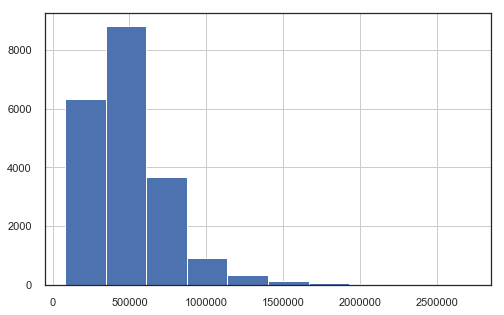

In [129]:
kc_df.price.hist(figsize = (8,5))

After scrubbing and cleaning the data sqft_living, sqft_living15 and price are still skewed.  Proceed to normalize the features and transform them using the Log Transformation method which can help reduce skewness and variability of data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000133995B20F0>,
      dtype=object)

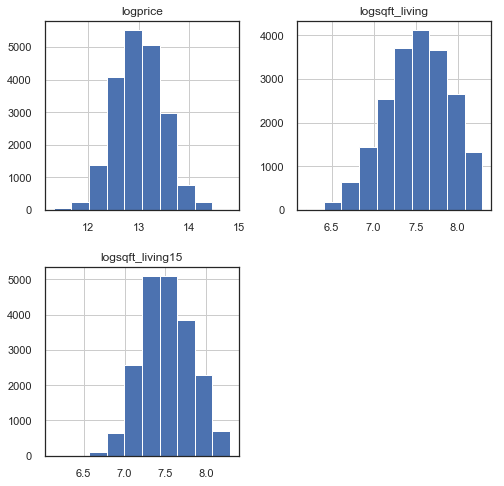

In [130]:
data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(kc_df['sqft_living'])
data_log['logsqft_living15'] = np.log(kc_df['sqft_living15'])
data_log['logprice'] = np.log(kc_df['price'])

data_log.hist(figsize  = [8,8])

The log transformation process did not change the data to completely normal distribtuions; however, it did help with the distribution and improved the skewness.

Scale the log transformed variables with Standardization to bring them to scale with properties of standard normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013394CDE2E8>,
      dtype=object)

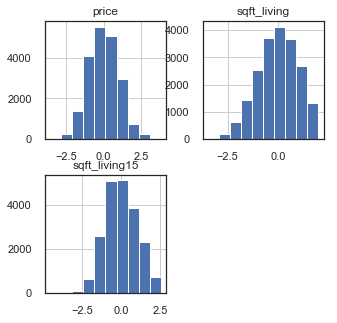

In [131]:
logsqft_living = data_log['logsqft_living']
logsqft_living15 = data_log['logsqft_living15']
logprice = data_log['logprice']

scaled_sqft_living = (logsqft_living - np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_sqft_living15 = (logsqft_living15 - np.mean(logsqft_living15))/np.sqrt(np.var(logsqft_living15))
scaled_price = (logprice - np.mean(logprice))/np.sqrt(np.var(logprice))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["sqft_living"] = scaled_sqft_living
data_cont_scaled["sqft_living15"] = scaled_sqft_living15
data_cont_scaled["price"] = scaled_price

data_cont_scaled.hist(figsize = (5,5))

#### Remove original continuous variables and add normalized & scaled continuous variables

In [132]:
kc_df = kc_df.drop(['price', 'sqft_living', 'sqft_living15'], axis = 1)

In [133]:
kc_df = pd.concat([kc_df, data_cont_scaled], axis = 1)

In [134]:
kc_df.head()

,date,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,long_2,...,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,sqft_living,sqft_living15,price
0,2014-10-13,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,-1.172113,-1.034848,-1.463607
1,2014-12-09,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0.865832,-0.276527,0.400731
2,2015-02-25,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,-2.289746,1.278628,-1.904140
3,2014-12-09,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0.156415,-0.986435,0.644323
4,2015-02-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,-0.247175,-0.070466,0.288218


### Drop Date from dataframe

Date is a timeseries feature; therefore, will be removed and analyzed separately.

In [135]:
kc_df_nodate = kc_df.drop(['date'], axis=1)

## Model & iNterpret the Data

Build a regression model that helps identify what features are predictors for the target variable, price.  Test for Goodness of Fit and model to an acceptable level meeting the coefficient p-value threshold of 0.05.

The below drop cells are select features that were dropped as a result of running the model and identified as multicollinear using VIF at the end of model run to improve results. 

In [145]:
kc_df_nodate = kc_df_nodate.drop(['zip_98052', 'zip_98115', 'zip_98103', 'zip_98022', 'grd_9', 'grd_7', 'lat_3', 
                                  'lat_7', 'lat_9'], axis=1)

In [155]:
kc_df_nodate = kc_df_nodate.drop(['long_2'], axis=1)

In [165]:
kc_df_nodate = kc_df_nodate.drop(['long_3'], axis=1)

### Linear Regression

#### Define functions for linear regression
1. Perform train_test_split
2. Fit the model
3. Calculate the predictions for test & train sets
4. Calculate the residuals
5. Print results

In [166]:
def linear_regression(X,y):
    
    # Perform train_test_split with test set and random state of 0.33 and 42, respectively.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    # Fit the model and apply to make test set predictions
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Calculate the predictions on test set
    y_hat_test = linreg.predict(X_test)
    
    # Calculate the predictions on train set
    y_hat_train = linreg.predict(X_train)
    
    # Calculate residuals
    train_residuals = y_hat_train - y_train
    test_residual = y_hat_test - y_test
    
    # Print results
    print('Length of X_train, X_test, y_train, y_test: ', len(X_train), len(X_test), len(y_train), len(y_test))
    print('R-Squared: ',round(linreg.score(X,y),2))
    print('Test Mean Squared Error (MSE): ', round(mean_squared_error(y_test, y_hat_test),5))
    print('Train Mean Squared Error (MSE): ', round(mean_squared_error(y_train, y_hat_train),5))
    print('Test Root Mean Squared Error (RMSE): ', round(np.sqrt(mean_squared_error(y_test, y_hat_test)),5))
    print('Train Root Mean Squared Error (RMSE): ', round(np.sqrt(mean_squared_error(y_train, y_hat_train)),5))
                
    return (linreg, y_hat_test, y_test)


### Run train_test_split Linear Regression

#### Identify X (Predictors/Features) and y (Target) and run Linear Regression

In [167]:
X = kc_df_nodate.drop(['price'], axis=1)
y = kc_df.price

linreg, y_hat_test, y_test = linear_regression(X,y)

Length of X_train, X_test, y_train, y_test:  13629 6714 13629 6714
R-Squared:  -2355905366564469.0
Test Mean Squared Error (MSE):  7138245885019419.0
Train Mean Squared Error (MSE):  0.16726
Test Root Mean Squared Error (RMSE):  84488140.49924
Train Root Mean Squared Error (RMSE):  0.40898


The length of the predictor and target train and test size shows the test size of 33% as defined in the function. 

The R-squared (e.g., the coefficient of determination) value should be between 0 & 1 if the model fits the sample data.  The first run at regression here produced a negative R-squared which indicates that the model is not running well and it doesn't fit the sample data.

The MSE and RMSE are summarized measures of the difference between the predictions and actual values.  The difference between these values are referred to as the residuals.  When looking at the summarized measures the ideal case is for there to be a small variance between the test and train set for both the MSE and RMSE.  Based on the results above, during the initial test and after feature elimination, there is a substantial difference between the test and train set and again as with the R-squared results indicates that this pass of the model is not a good fit (e.g., since the difference between these measures is large it is an indication of overfitting).  Additionally, the test errors are substantially worse than the train errors which means that the model is not working properly for future predictions.

### k-Fold Cross-Validation - 15 Fold

As indicated above, the initial train_test_split results suggest that it was not an effective model.  One of the reasons this procedure alone does not produce sufficient results is due to the random sampling that comes with train_test_split.

In this case, another technique, k-Fold Cross-Validation, will be modeled in an attempt to improve results. 

The initial k-Fold Cross-Validation ("k-Fold") will have a k equal to 15, which means the entire dataset will be split into 15 equal sections, with the exception of the one section since the dataset cannot be split evenly.  The results of the k-Fold are generally a less biased estimate of the a model vs. a train_test_split.  It is important to note that each datapoint in the sample is assisgned to an individual group, or fold, and stays in that group for the entire cross-validation process.  Additionally, each fold is tested once and is then used to train the model for k-1 iterations.

The scoring chosen for the following k-Fold is Negative Mean Squared Error.

In [168]:
cv_15_results = cross_val_score(linreg, X, y, cv=15, scoring="neg_mean_squared_error")

cv_15_results

array([-1.63610097e-01, -1.69295347e-01, -1.92853036e-01, -1.99111976e-01,
       -1.64213919e+19, -1.92258083e-01, -2.80203846e+16, -1.61007978e-01,
       -1.72237491e-01, -1.65802014e-01, -1.52617291e+15, -1.62206321e-01,
       -1.69101077e-01, -1.60357078e-01, -1.28276469e-01])

Most of the results from this 15-fold Cross Validation are okay; however, there are several that are significanly too high. This is often a sign that there are too many categorical variables and is likely the case here given all but two of the features are  dummy variables.  Given these results another method, Stepwise Selection, will be used to eliminate features that cause the lack of model performance.

### Identify Subset of Predictor Variables

Ideally, one of the goals of a regression model is to find the subset of predictor variables that make the model as complete and realistic as possible.  Too many variables increases the complexity of the model, but not enough will effect the precision of the model.

Thus far the model is not performing well, therefore a variable selection process will be initiated.  The selection process will be Stepwise Selection, where it goes through a forward & backward predictor selection process that is based on p-value and two set thresholds.  The thresholds determine when a predictor is selected and/or removed, (e.g., if the p-value is less than 0.01 it is included and if it is greater than 0.05 it is removed).  

### Stepwise Selection

In [169]:
# Perform Stepwise Selection

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [170]:
result = stepwise_selection(X, y, verbose = True)
print('Resulting Features:')
print(result)

Add  seen_1.0                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat_5                          with p-value 0.0
Add  lat_8                          with p-value 0.0
Add  lat_4                          with p-value 0.0
Add  zip_98023                      with p-value 2.05939e-289
Add  zip_98004                      with p-value 1.76056e-265
Add  sqft_living15                  with p-value 1.38554e-235
Add  zip_98001                      with p-value 7.3211e-234
Add  zip_98092                      with p-value 7.71177e-213
Add  zip_98112                      with p-value 3.38855e-208
Add  zip_98003                      with p-value 2.81313e-201
Add  zip_98002                      with p-value 7.29512e-171
Add  zip_98040                      with p-value 2.00382e-127
Add  zip_98122                      with p-value 1.44057e-113
Add  zip_98116                      with p-value 2.0342e-98
Add  grd_10                         with p-value 4.4623e

C:\Users\lizak\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zip_98034                      with p-value 2.4393e-07
Drop zip_98126                      with p-value 0.685341
Add  zip_98125                      with p-value 2.66903e-08
Add  zip_98070                      with p-value 2.24203e-07
Drop lat_4                          with p-value 0.0890063
Add  flrs_3.0                       with p-value 1.21937e-05
Add  grd_8                          with p-value 1.14598e-05
Add  grd_12                         with p-value 1.68432e-05
Add  baths_1.75                     with p-value 6.42405e-05
Add  beds_6                         with p-value 4.76234e-05
Add  baths_2.0                      with p-value 0.000163634
Drop flrs_1.0                       with p-value 0.0954146
Add  beds_7                         with p-value 0.000171265
Add  zip_98072                      with p-value 0.00034772
Add  grd_4                          with p-value 0.000686821
Add  zip_98065                      with p-value 0.0019914
Add  beds_8                        

The features selected with the stepwise selection are listed above along with the features' p-value.

### train_test_split Linear Regression with Selected Features

In [171]:
X = kc_df_nodate[result]
y = kc_df_nodate.price

linreg, y_pred, y_test = linear_regression(X,y)

Length of X_train, X_test, y_train, y_test:  13629 6714 13629 6714
R-Squared:  0.83
Test Mean Squared Error (MSE):  0.16627
Train Mean Squared Error (MSE):  0.16792
Test Root Mean Squared Error (RMSE):  0.40776
Train Root Mean Squared Error (RMSE):  0.40978


The train_test_split linear regression results with the selected features are much more acceptable than the initial round that included all features from the EDA process.

R-squared is much improved an within an acceptable level and a good sign that with only the selected features the model is much better "fit".

The MSE and RMSE are no longer significantly different and are very low which is another good sign that the model is improved using the selected features from the stepwise selection.


### k-Fold Cross-Validation - 5 Fold

In [172]:
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

cv_5_results

array([-0.17544976, -0.18304608, -0.16844951, -0.1682753 , -0.15320794])

This k-fold cross-validation produced much more acceptable errors.  The feature selection is the likely source here given all of the features eliminated were categorical.

### Run Ordinary Least Squared (OLS) in Statsmodels using Significant Features

The OLS Statsmodels is a method for estimating parameters within a linear regression model.  It runs a variety of tests and also produces results that explain the goodness of fit.

In [173]:
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1063.
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:42:35   Log-Likelihood:                -10658.
No. Observations:               20343   AIC:                         2.151e+04
Df Residuals:                   20247   BIC:                         2.227e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2242      0.015     14.910      0.000       0.195       0.254
seen_1.0          0.3042      0.011     26.761      0.000       0.282       0.326
sqft_living       0.3997      0.005     78.261      0.000       0.390       0.410
lat_5            -0.1833      0.017    -11.076      0.000      -0.216      -0.151
lat_8             0.3013      0.013     22.393      0.000       0.275       0.328
zip_98023        -1.3078      0.024    -55.284      0.000      -1.354      -1.261
zip_98004         1.0839      0.030     36.571      0.000       1.026       1.142
sqft_living15     0.1422      0.005     30.209      0.000       0.133       0.151
zip_98001        -1.2379      0.027    -45.598      0.000      -1.291      -1.185
zip_98092        -1.1208      0.027    -41.240      0.000      -1.174      -1.068
zip_98112         0.8968      0.030     30.178      0.000       0.839       0.955
zip_98003        -1.2027      0.029    -41.001      0.000      -1.260      -1.145
zip_98002        -1.2449      0.033    -37.168      0.000      -1.311      -1.179
zip_98040         0.6889      0.032     21.772      0.000       0.627       0.751
zip_98122         0.4481      0.028     15.805      0.000       0.393       0.504
zip_98116         0.3579      0.027     13.207      0.000       0.305       0.411
grd_10            0.3449      0.016     21.096      0.000       0.313       0.377
zip_98119         0.6490      0.032     20.097      0.000       0.586       0.712
zip_98039         1.5271      0.079     19.363      0.000       1.372       1.682
zip_98042        -0.9999      0.022    -46.494      0.000      -1.042      -0.958
zip_98109         0.6910      0.042     16.509      0.000       0.609       0.773
long_5           -0.3567      0.027    -13.031      0.000      -0.410      -0.303
zip_98038        -0.7151      0.022    -33.077      0.000      -0.757      -0.673
zip_98030        -1.1662      0.029    -39.669      0.000      -1.224      -1.109
zip_98102         0.6502      0.043     15.175      0.000       0.566       0.734
zip_98178        -0.9223      0.031    -29.500      0.000      -0.984      -0.861
zip_98168        -0.9878      0.032    -30.853      0.000      -1.051      -0.925
zip_98006         0.1913      0.025      7.800      0.000       0.143       0.239
zip_98198        -1.1431      0.029    -39.356      0.000      -1.200      -1.086
zip_98031        -1.1171      0.029    -38.873      0.000      -1.173      -1.061
zip_98032        -1.2993      0.040    -32.889      0.000      -1.377      -1.222
zip_98005         0.3764      0.036     10.424      0.000       0.306       0.447
zip_98136         0.1493      0.030      5.044      0.000       0.091       0.207
zip_98144         0.0947      0.027      3.517      0.000       0.042       0.147
zip_98105         0.4237      0.030     14.359   

#### Goodness of Fit Results

R-squared of 0.833 means that 83.3% of the variance in the dependent/target variable, (e.g., price), can be explained by the all  independent variables (e.g., selected features).  This score is within an acceptable range.

Adj R-squared of 0.832 means that 83.2% of the variance in price can be explained by the selected features that truly affect the dependent variable. The adjusted R-squared is slightly lower than R-squared, which should always be the case and it is still at an acceptable level.

The p-value for the F-test is 0 (e.g., less than the significance level of 0.05), therefore there is sufficient evidence to conclude that the model fits the data better than the model without any feature variables.  The null hypothesis for the F-test would be that the model with no feature variables fits the data as well as this model.  Therefore, the null hypothesis would be rejected as the model fits the data better than if it had no independent variables.

#### Coefficient Results

The absolute t-statistic values (t) are all relatively large, therefore it isn't very likely that the actual value of the parameter could be zero.

The P > |t| of each variable are all equal to 0 (e.g., there are only a handful that are slightly greater than 0) and less than the confidence level of 0.05.  This means that all of the selected features have a statistically significant relationship with the target variable (e.g., reject the null hypothesis and this set of predictors).

#### Residuals, Autocorrelation and Multicollinearity

The JB test is very large and greater than one which means that the normality null hypothesis is rejected at a confidence level of 0.05 and that the data doesn't come from normal distribution.

The Skew is not zero which also indicates that the data is not normally distributed.

Kurtosis is above three which indicates a higher than normal distribution peak (e.g., the curve peaks higher).

### Variance Inflation Factor

The first passes of the above model indicated that multicollinearity still existed.  The variance inflation factor ("VIF") is a function that detects multicollinearity between predictor variables in mulitple regression.  In order to address this suspicion, the VIF function was run until no pretictor variables came through with VIF Factors greater than 5 (VIF >= 5 means the Features are highly correlated with each other).  After each pass, predictor variables with high VIF Factors were removed from the dataset (e.g, reference cells 145, 155 and 165 at the beginning of this process (e.g., Model & iNterpret the data).   

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X_fin)
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif.loc[(vif.VIF_Factor > 5)]

,VIF_Factor,Features
0,27.432891,const


### Conclusion

The goal of this project was to determine what market and home features are good predictors of home sale prices in King County, Washington.  The data process assigned to reach this goal was the OSEMN framework.  The final model produced acceptable Goodness of Fit results and none of the selected features have p-values greater than 0.05.

The significant features selected during the stepwise selection process were both continuous and categorical.  Ultimately the model ended up with significant features based on the size of the home (e.g., square foot living space), where the home was located (e.g., zipcode, latitude and longitude) and several others (e.g., certain number of floors, bathrooms and bedrooms in the home, select grades given to the home and if the home had been renovated or viewed).

Model interpretation for three of the significant features/predictors based on coefficient results, as follows:
  * Sqft_living:  Holding all other variables constant, it is predicted that as the square foot living space increases, the home price will also increase.  Intuitively, this makes sense as more living space means the price for the home will be higher.
  * Viewed:  Holding all other variables constant, if a house is has been viewed it is predicted that the house price will be higher.  If a house has been viewed it is likely that it is of more interest to a home buyer that one that has no viewings.  This generates more market interest and consequently drive up the home price.
  * Zipcode:  This feature is categorical and based on specific zipcodes with no change in other variables, it is predicted that some zipcodes will see an lower home price while other will see a higher home price, 98023 and 98039, respectively.  Location matters.
  

Some additional next steps/analysis for this model would be:
  
  1.) Look into the date feature, as experience in the real estate industry has historically shown, the time of year influences housing prices.  
  
  2.) Join the latitude and longitude features for exact mapping location.  Determine or add this as another feature and remove the separate lat & long features to see how the signifance, if any, impacts the resulting selected features and impact of price.
  
  3.) Additionally, transformation of data would be looked at more extensively to moderate impact on the resulting skewness, kurtosis and complete model performance.